<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Project 2 - Singapore Housing Data and Kaggle Challenge

--- 
# Background



---

This project is done as part of the Data Science Immersive course in General Assembly, and was completed in a short time frame of only 2 weeks. We are tasked with creating a regression model based on the [Singapore Public Housing Dataset](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price) to predict the price of resale HDB (Housing and Development Board) flats.

HDB resale prices in Singapore refer to the market value of public housing flats that are sold by existing homeowners to prospective buyers. The HDB is Singapore's public housing authority and plays a crucial role in providing affordable housing for the country's citizens.

The resale market for HDB flats emerged in the 1980s, allowing homeowners to sell their subsidized public housing units to other eligible buyers. This provided an opportunity for homeowners to monetize their investments and move to different locations or upgrade to larger flats as their needs changed.

Based on domain knowledge, the resale price of HDB flats may be influenced by several factors. Location is generally a determinant, with flats located in prime areas or those close to amenities commanding higher prices. Other factors may include the flat's size, condition, floor level, and remaining lease duration. Additionally, market forces such as supply and demand dynamics, economic conditions, and government policies can also impact resale prices.

Over the years, HDB resale prices have generally experienced an upward trend due to Singapore's economic growth, increasing demand for housing, and limited land availability. The government has implemented various measures to ensure affordability and stability in the public housing market.

However, the HDB resale market remains a big market, and it is important to get ahead in one’s planning when looking to buy or sell a HDB resale flat.

## Problem Statement

Being able to predict the price of HDB resale flats is important as part of planning, and can help sellers know if they can optimise their selling price, and help buyers know if they are getting their money's worth. For the case of real estate agencies, being able estimate the price of HDB resale flats can also help them close deals for their clients and provide their clients with a seamless experience, saving time and money.

Thus, there is value in creating machine learning models to achieve the above.

--- 
## Data Import and Cleaning



---

We will be importing a number of libraries namely pandas, numpy, matplot and seaborn, as well as scikit-learn libraries.

In [1]:
#importing and settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 200)

## Cleaning

This section involves of assessing the datatypes, dropping of columns, dealing with missing and null values, standardizing the naming cases 

The uncleaned Kaggle dataset is not ideal for modeling, hence cleaning is necessary.

In [2]:
#Import the data
data = pd.read_csv('datasets/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [4]:
#standardizing all column names to be in snake case
data.columns = data.columns.str.lower().str.replace(' ','_')

In [5]:
#dropping price_per_sqft since we cannot use this for our prediction
data.drop('price_per_sqft', axis = 1, inplace = True)

In [6]:
#any columns with only 1 unique value will not be helpful in a prediction model 
for x in data.columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 1:
        data.drop(x, axis=1, inplace=True)
        print(f'{x} column dropped due to having only 1 unique value')
        print()

id 150634
tranc_yearmonth 110
town 26
flat_type 7
block 2514


street_name 553
storey_range 25
floor_area_sqm 169
flat_model 20
lease_commence_date 54
resale_price 3295
tranc_year 10
tranc_month 12
mid_storey 22
lower 22
upper 23
mid 22
full_flat_type 43
address 9157
floor_area_sqft 169
hdb_age 54
max_floor_lvl 41
year_completed 59
residential 1
residential column dropped due to having only 1 unique value

commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
total_dwelling_units 320
1room_sold 2
2room_sold 99
3room_sold 255
4room_sold 200
5room_sold 133
exec_sold 103
multigen_sold 7
studio_apartment_sold 61
1room_rental 11
2room_rental 48
3room_rental 15
other_room_rental 3
postal 17483
latitude 9126
longitude 9098
planning_area 32
mall_nearest_distance 8983
mall_within_500m 7
mall_within_1km 16
mall_within_2km 42
hawker_nearest_distance 9126
hawker_within_500m 6
hawker_within_1km 10
hawker_within_2km 20
hawker_food_stalls 52
hawker_market_stalls 70
mrt_nearest_distance 9126
mrt_name 94
bus_interchange 2
mrt_interchange 2
mrt_lat

In [7]:
#Dropping id value as it is only use for identification
data.drop('id', axis = 1, inplace=True)

In [8]:
#dropping block, street_name, address, postal and bus_stop_name as there are too many unique values 
data.drop(['block', 'street_name', 'address', 'postal', 'bus_stop_name'], axis = 1, inplace = True)

In [9]:
#dropping longitude and latitude columns
data.drop(['latitude', 'longitude', 'mrt_latitude', 'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude'], axis = 1, inplace = True)

In [10]:
#dropping floor_area_sqft becauses we have floor_area_sqm
data.drop('floor_area_sqft', axis = 1, inplace = True)

In [11]:
#dropping lease_commence_date and year_completed because we have hdb_age
data.drop(['lease_commence_date','year_completed'], axis = 1, inplace = True)

In [12]:
#checking remaining object dtype columns and the number of values
for x in data.select_dtypes(include='object').columns:
    print(x, len(data[x].unique()))

tranc_yearmonth 110
town 26
flat_type 7
storey_range 25
flat_model 20
full_flat_type 43
commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
planning_area 32
mrt_name 94
pri_sch_name 177
sec_sch_name 134


### Missing values

In [13]:
#finding columns with null values
data.isnull().sum().sort_values().tail(8)

2room_sold                   0
mall_nearest_distance      829
mall_within_2km           1940
mall_within_1km          25426
hawker_within_2km        29202
hawker_within_1km        60868
mall_within_500m         92789
hawker_within_500m       97390
dtype: int64

In [14]:
data['mall_nearest_distance']

0         1094.090418
1          866.941448
2         1459.579948
3          950.175199
4          729.771895
             ...     
150629     585.138715
150630     250.084466
150631    1790.053482
150632     587.244922
150633     225.435937
Name: mall_nearest_distance, Length: 150634, dtype: float64

In [15]:
data[data['mall_nearest_distance'].isnull()][['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km']]

,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km
75,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN
691,NaN,NaN,NaN,NaN
...,...,...,...,...
150296,NaN,NaN,NaN,NaN
150388,NaN,NaN,NaN,NaN
150394,NaN,NaN,NaN,NaN
150479,NaN,NaN,NaN,NaN


In [16]:
#Exploring Null Rows - looks like null value are 0 (i.e. no malls within stated distance)
data[data['mall_nearest_distance'].isnull()][['mall_within_500m', 'mall_within_1km', 'mall_within_2km']]

,mall_within_500m,mall_within_1km,mall_within_2km
75,NaN,NaN,NaN
321,NaN,NaN,NaN
478,NaN,NaN,NaN
643,NaN,NaN,NaN
691,NaN,NaN,NaN
...,...,...,...
150296,NaN,NaN,NaN
150388,NaN,NaN,NaN
150394,NaN,NaN,NaN
150479,NaN,NaN,NaN


In [17]:
#imputing a value of over 2000m for the null values in 'mall_nearest_distance'
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=2001)
data['mall_nearest_distance'] = imputer.fit_transform(data['mall_nearest_distance'].values.reshape(-1,1))


In [18]:
#filling null values with 0
col_with_null = data.columns[data.isnull().sum() != 0].to_list()
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0)
for x in col_with_null:
    data[x]=imputer.fit_transform(data[x].values.reshape(-1,1))

### Categorical Data

In [19]:
#Since machine learning can only take numeric inputs, we will have to convert useful categorical columns to numeric form 
data.select_dtypes(include='object').columns

Index(['tranc_yearmonth', 'town', 'flat_type', 'storey_range', 'flat_model',
       'full_flat_type', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'planning_area', 'mrt_name', 'pri_sch_name',
       'sec_sch_name'],
      dtype='object')

In [20]:
#Checking if tranc_yearmonth is consistent with 'tranc_year', 'tranc_month'
data[['tranc_yearmonth','tranc_year', 'tranc_month']]

,tranc_yearmonth,tranc_year,tranc_month
0,2016-05,2016,5
1,2012-07,2012,7
2,2013-07,2013,7
3,2012-04,2012,4
4,2017-12,2017,12
...,...,...,...
150629,2020-09,2020,9
150630,2017-06,2017,6
150631,2020-12,2020,12
150632,2016-05,2016,5


In [21]:
#drop tranc_yearmonth as there is already tranc_year and tranc_month
data.drop('tranc_yearmonth', axis = 1, inplace=True)

In [22]:
#checking if storey_range column is consistent with 'mid_storey', 'lower', 'upper', 'mid'
data[['storey_range','mid_storey', 'lower', 'upper', 'mid']]

,storey_range,mid_storey,lower,upper,mid
0,10 TO 12,11,10,12,11
1,07 TO 09,8,7,9,8
2,13 TO 15,14,13,15,14
3,01 TO 05,3,1,5,3
4,01 TO 03,2,1,3,2
...,...,...,...,...,...
150629,04 TO 06,5,4,6,5
150630,04 TO 06,5,4,6,5
150631,10 TO 12,11,10,12,11
150632,07 TO 09,8,7,9,8


In [23]:
#Checking if mid_storey == mid columns
(data['mid_storey'] == data['mid']).value_counts()

True    150634
dtype: int64

In [24]:
#drop mid_storey
data.drop('mid_storey', axis = 1, inplace=True)

In [25]:
#checking if town == planning_area 
data[['town', 'planning_area']]

,town,planning_area
0,KALLANG/WHAMPOA,Kallang
1,BISHAN,Bishan
2,BUKIT BATOK,Bukit Batok
3,BISHAN,Bishan
4,YISHUN,Yishun
...,...,...
150629,WOODLANDS,Woodlands
150630,JURONG WEST,Jurong West
150631,BEDOK,Bedok
150632,QUEENSTOWN,Queenstown


In [26]:
data['town'] = data['town'].str.lower()
data['planning_area'] = data['planning_area'].str.lower()

In [27]:
data[['town', 'planning_area']]

,town,planning_area
0,kallang/whampoa,kallang
1,bishan,bishan
2,bukit batok,bukit batok
3,bishan,bishan
4,yishun,yishun
...,...,...
150629,woodlands,woodlands
150630,jurong west,jurong west
150631,bedok,bedok
150632,queenstown,queenstown


In [28]:
(data['town'] == data['planning_area']).value_counts()

True     144931
False      5703
dtype: int64

In [29]:
data[(data['town'] == data['planning_area']) == False][['town', 'planning_area']]

,town,planning_area
0,kallang/whampoa,kallang
32,kallang/whampoa,novena
35,kallang/whampoa,kallang
55,kallang/whampoa,kallang
88,central area,rochor
...,...,...
150507,kallang/whampoa,kallang
150510,kallang/whampoa,kallang
150511,kallang/whampoa,kallang
150524,central area,outram


In [30]:
#Planning area is more precise than town so we will drop town since most values are repeated
data.drop('town', axis = 1, inplace=True)

In [31]:
#checking if flat_type and full_flat_type is consistent
(data['flat_type'] == data['full_flat_type']).value_counts()

False    150634
dtype: int64

In [32]:
data[['flat_type', 'full_flat_type', 'flat_model']]

,flat_type,full_flat_type,flat_model
0,4 ROOM,4 ROOM Model A,Model A
1,5 ROOM,5 ROOM Improved,Improved
2,EXECUTIVE,EXECUTIVE Apartment,Apartment
3,4 ROOM,4 ROOM Model A,Model A
4,4 ROOM,4 ROOM Simplified,Simplified
...,...,...,...
150629,EXECUTIVE,EXECUTIVE Apartment,Apartment
150630,5 ROOM,5 ROOM Improved,Improved
150631,EXECUTIVE,EXECUTIVE Apartment,Apartment
150632,3 ROOM,3 ROOM Improved,Improved


In [33]:
#drop full_flat_type as there is already flat_type and flat_modela
data.drop('full_flat_type', axis = 1, inplace = True)

In [34]:
data.select_dtypes(include='object').columns

Index(['flat_type', 'storey_range', 'flat_model', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'planning_area', 'mrt_name', 'pri_sch_name', 'sec_sch_name'],
      dtype='object')

In [35]:
data.select_dtypes(include=('int64', 'float64')).columns

Index(['floor_area_sqm', 'resale_price', 'tranc_year', 'tranc_month', 'lower',
       'upper', 'mid', 'hdb_age', 'max_floor_lvl', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'bus_interchange',
       'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'sec_sch_nearest_dist', 'cutoff_point', 'affiliation'],
      dtype='object')

--- 
## Baseline Model



---

We will try to do a baseline model based on just floor area to see how far we have to go for a viable model. We assume simply that the higher the floor area, the higher the resale price.

In [36]:
X = data['floor_area_sqm'].to_frame()
y = data['resale_price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#no skew no scale
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)
print('Linear Regression score:',lr.score(X_train,y_train))
ypred=lr.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_test,ypred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,ypred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,ypred)))
print('Test Score: ',lr.score(X_test, y_test))
print('Train Score: ', lr.score(X_train, y_train))

75766.23366279807
[3841.68561836]
Linear Regression score: 0.4283964574981577
Mean Squared Error:  11781353261.522331
Mean Absolute Error:  76656.03201585391
Root Mean Squared Error:  108541.94240717425
Test Score:  0.4263023693180451
Train Score:  0.4283964574981577


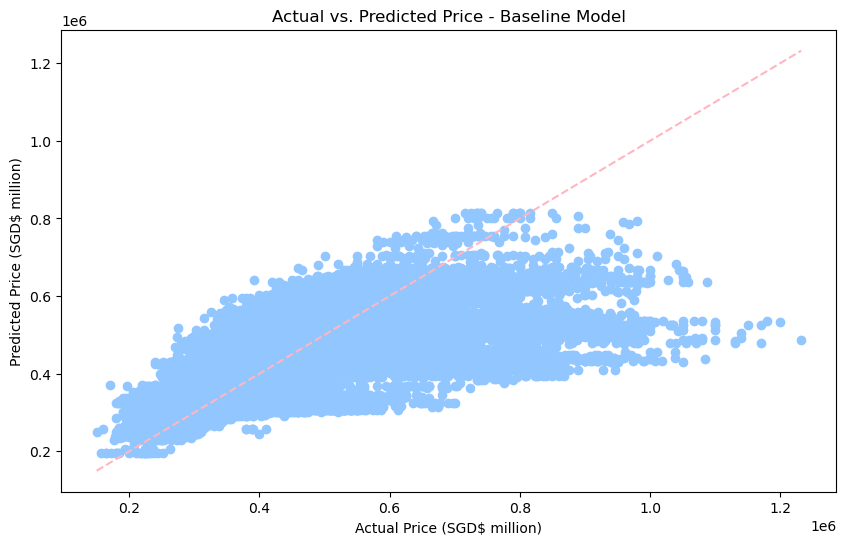

In [38]:
#Plotting baseline model prediction against actual price
plt.figure(figsize=(10,6))
plt.scatter(y_test, ypred)
#best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'lightpink', linestyle = 'dashed')
plt.xlabel('Actual Price (SGD$ million)')
plt.ylabel('Predicted Price (SGD$ million)')
plt.title('Actual vs. Predicted Price - Baseline Model')
plt.show()

-------------------

--- 
# Exploratory Data Analysis



---

We will do some EDA to get to know the data better.

## EDA


Text(0.5, 0, 'Resale Price (SGD$ million)')

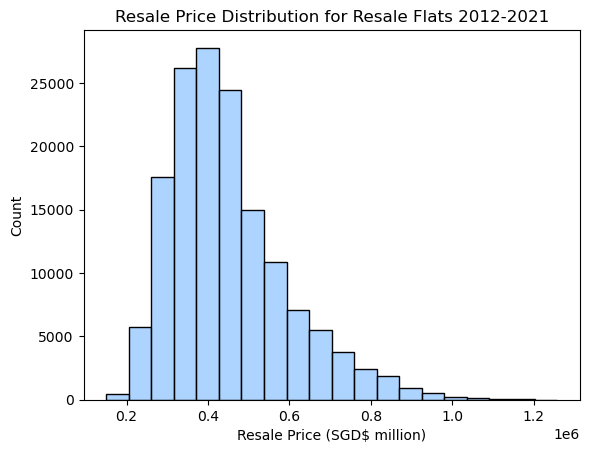

In [39]:
#Plot to look at resale prices distribution 
sns.histplot(data=data, x= 'resale_price', bins=20, stat='count')
plt.title('Resale Price Distribution for Resale Flats 2012-2021')
plt.xlabel('Resale Price (SGD$ million)')

<small>Based on the histogram plot of resale flat prices from 2012 to 2021, it is evident that the highest frequency of transactions occurred near $400,000 SGD.</small>

Text(0.5, 1.0, 'Top 10 Features and its Correlation to Resale Price')

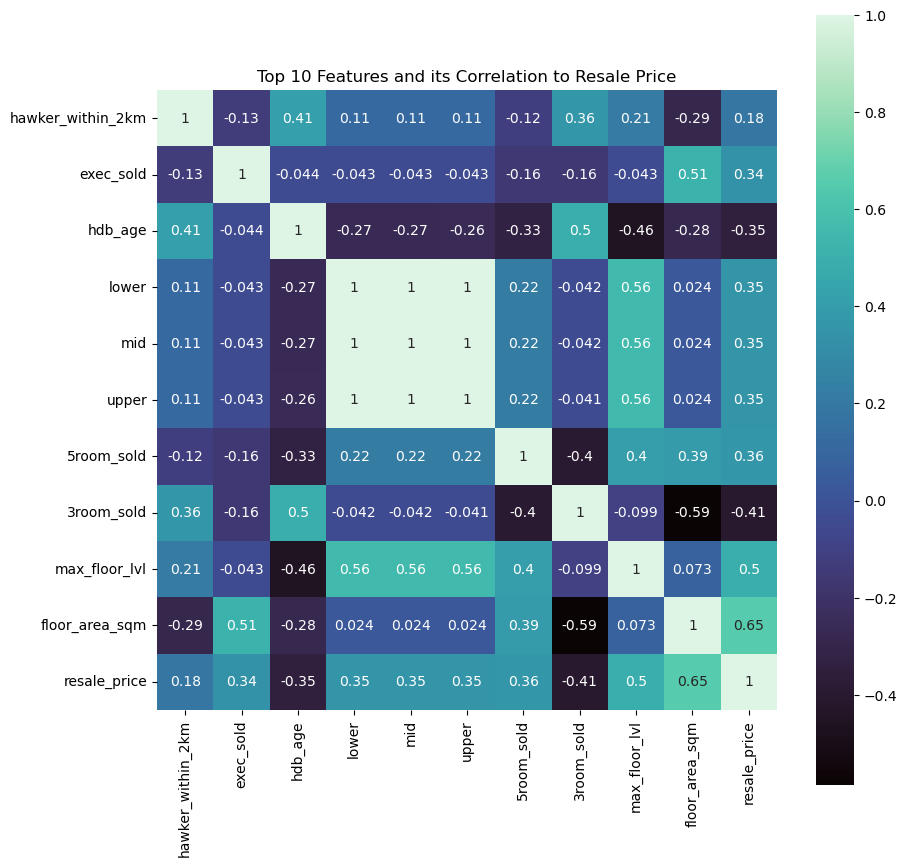

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(data[data.corr().abs()['resale_price'].sort_values().tail(11).index].corr(), annot=True, cmap='mako', square=True)
plt.title('Top 10 Features and its Correlation to Resale Price')


<small>From the correlation heatmap, bigger floor area and flats from taller buildings tend to fetch higher resale price. Flats from buildings with more 3 rooms units and older flats tend to fetch lower price. We can also infer that flats from buildings with higher amount of 5 room flats/exec flats, flats on the upper storey and having hawker within 2km radius tend to have higher resale pricing.</small>

Text(0.5, 0, 'Counts')

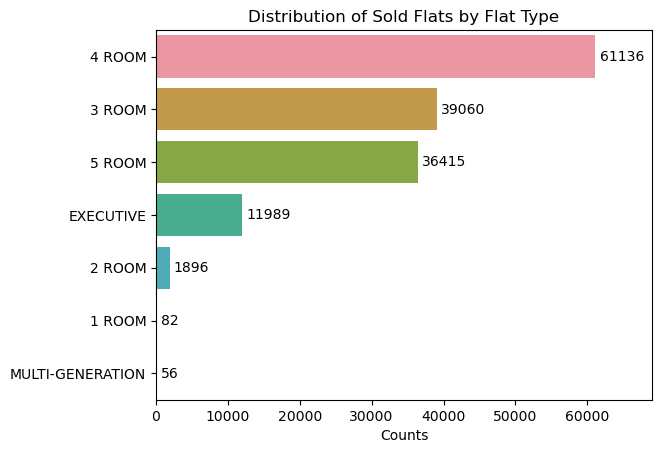

In [41]:
ax = sns.barplot(y=data['flat_type'].value_counts().index, x=data['flat_type'].value_counts().values)
plt.title('Distribution of Sold Flats by Flat Type')
ax.bar_label(ax.containers[0], label_type='edge', padding= 3)
ax.set_xlim(0, 69000)
plt.xlabel('Counts')

<small>The plot reveals that 4-room flats had the highest frequency of sales, followed by 3-room flats, and closely behind were 5-room flats. The dominance of 4-room flats suggests that they were the most sought-after among buyers, potentially due to factors such as their size, affordability, availability and suitability for various household sizes.<br>The relatively high sales of 3-room flats indicate a significant demand for smaller-sized units, which may be preferred by individuals or couples seeking more compact living spaces. The close proximity in sales volume between 3-room and 5-room flats suggests that both sizes were in relatively high demand but appealed to different groups of buyers.</small>

(0.0, 52000.0)

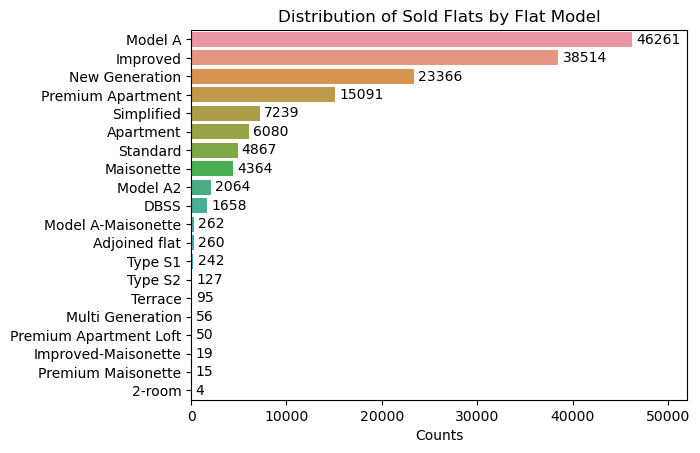

In [42]:
ax = sns.barplot(y=data['flat_model'].value_counts().index, x=data['flat_model'].value_counts().values)
plt.title('Distribution of Sold Flats by Flat Model')
plt.xlabel('Counts')
ax.bar_label(ax.containers[0], label_type='edge', padding= 3)
ax.set_xlim(0, 52000)

<small>Most of the resale flats sold in the 2012 to 2021 period are Model A.

Text(0.5, 0, 'Age of Flat (Years)')

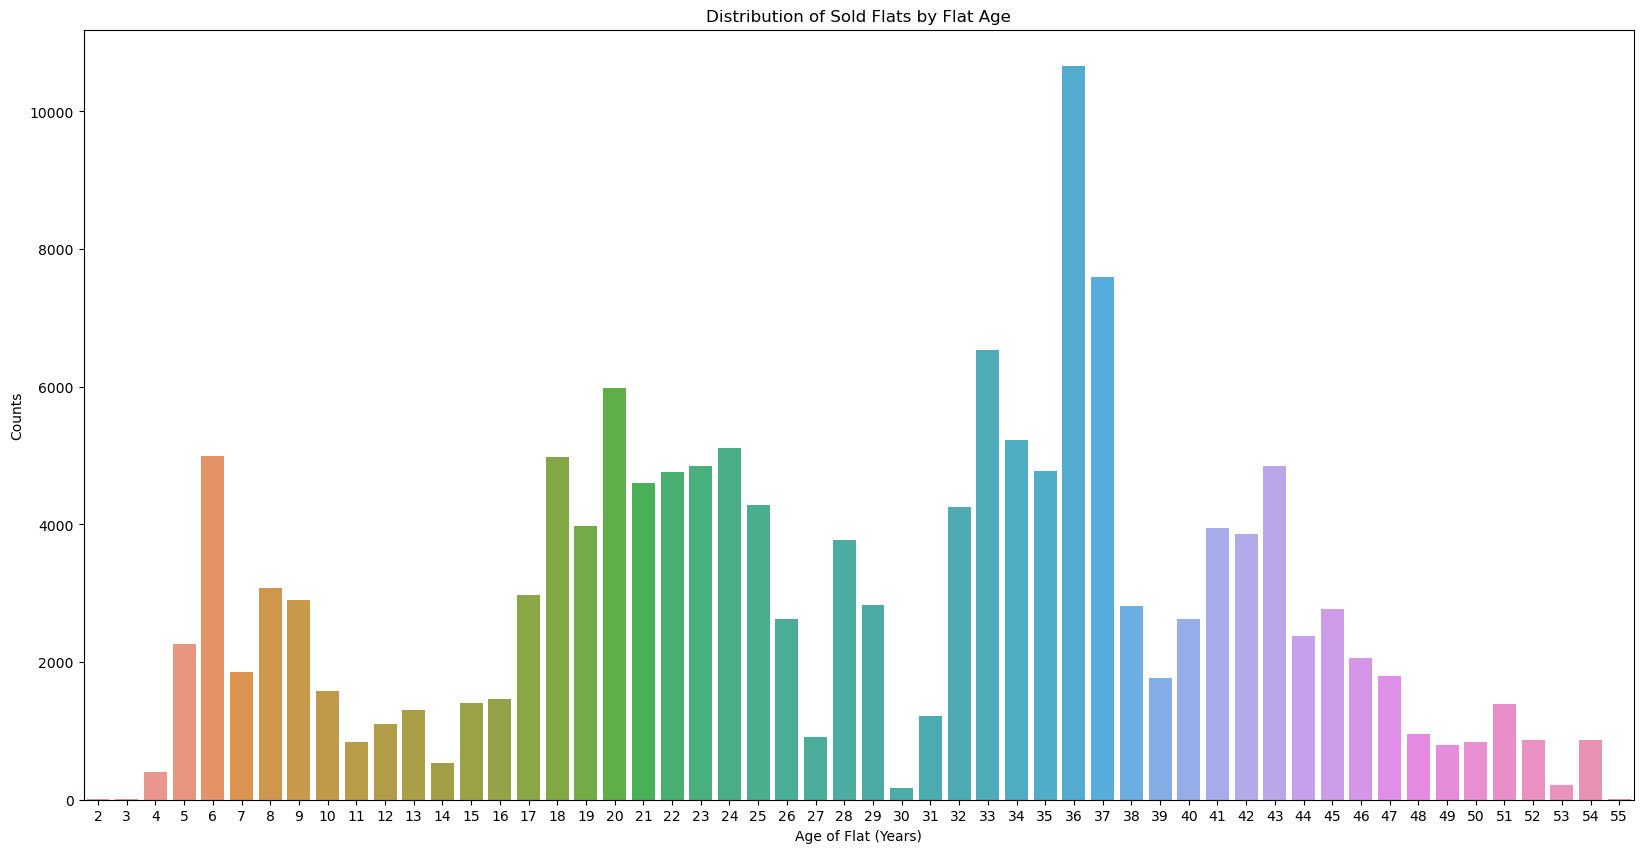

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['hdb_age'].value_counts().sort_index().index, y=data['hdb_age'].value_counts().sort_index().values)
plt.title('Distribution of Sold Flats by Flat Age')
plt.ylabel('Counts')
plt.xlabel('Age of Flat (Years)')

The analysis of resale flat frequency distribution reveals the presence of multiple peaks at different flat ages. This suggests that there are distinct clusters or groups of flats that are being transacted more frequently within specific age ranges.<br>
The first peak occurs at 6 years flat age, which coincide with the conclusion of MOP (minimum occupancy period). After the completion of the MOP, homeowners become eligible to sell their flats without any restrictions imposed by the MOP policy. Therefore, many homeowners may choose to put their flats on the market during this period to explore new housing options or to meet changing needs such as upsizing or downsizing. Some homeowners might choose to sell their flats after the MOP to capitalize on potential capital gains. Over the MOP duration, property values may appreciate, and homeowners may opt to sell their flats to benefit from the increased market value, thereby potentially making a profit.<br>
There is also a peak at its 20th year, 36th year and 43rd year. This is likely to counter the depreciating price due to remaining lease.<br>

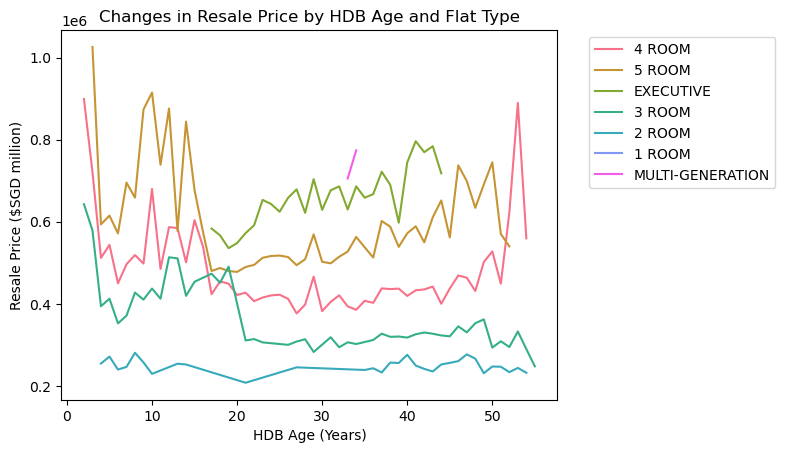

In [44]:
sns.lineplot(data=data, x='hdb_age', y='resale_price', hue='flat_type', ci=None)
plt.xlabel('HDB Age (Years)')
plt.ylabel('Resale Price ($SGD million)')
plt.title('Changes in Resale Price by HDB Age and Flat Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

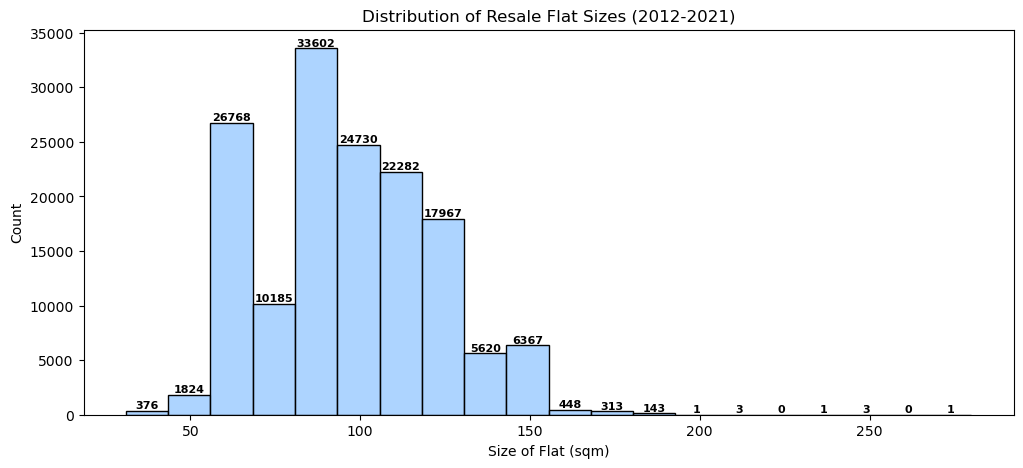

In [45]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data=data, x= 'floor_area_sqm', bins=20, stat='count')
plt.title('Distribution of Resale Flat Sizes (2012-2021)')
plt.xlabel('Size of Flat (sqm)')
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=8, fontweight='bold')

The majority of flats sold in the resale market between 2012 and 2021 fall within the size range of 60 square meters to 140 square meters. This range represents the most common sizes preferred by buyers, with a peak occurring specifically at the 90-100 square meter mark.<br>
The peak at the 90-100 square meter mark suggests a particularly popular size preference among buyers. This may be due to factors such as the availability of flats within this size range, their relative affordability compared to larger units, or their suitability for the typical housing needs of Singaporean families.

Text(0.5, 0, 'Month')

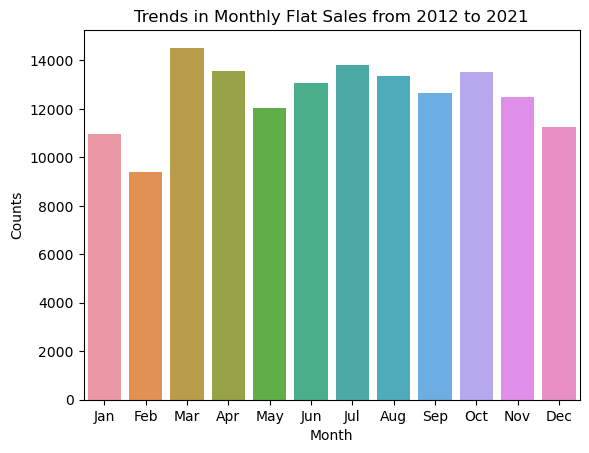

In [46]:
sns.barplot(x=data['tranc_month'].value_counts().sort_index().index, y=data['tranc_month'].value_counts().sort_index().values)
plt.title('Trends in Monthly Flat Sales from 2012 to 2021')
plt.ylabel('Counts')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), months)
plt.xlabel('Month')

Text(0.5, 0, 'Year')

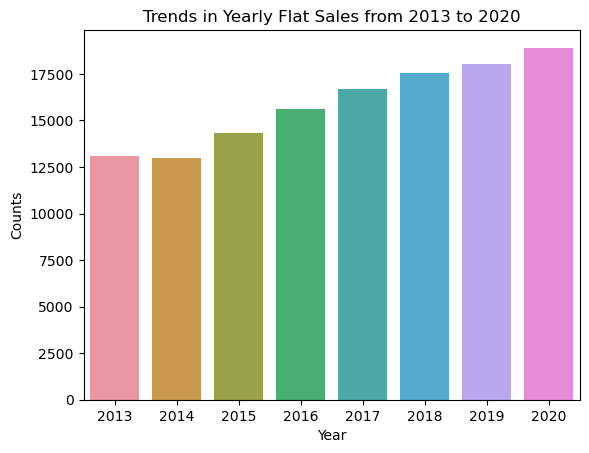

In [47]:
sns.barplot(x=data[(data['tranc_year'] > 2012) & (data['tranc_year'] < 2021)]['tranc_year'].value_counts().index, y=data[(data['tranc_year'] > 2012) & (data['tranc_year'] < 2021)]['tranc_year'].value_counts().values)
plt.title('Trends in Yearly Flat Sales from 2013 to 2020')
plt.ylabel('Counts')
plt.xlabel('Year')

Since 2014, there has been a consistent upward trend in the number of flats transacted within the resale market.

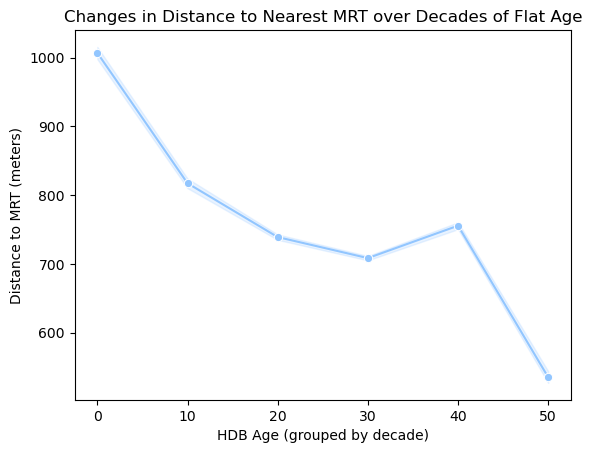

In [48]:
data['decade'] = (data['hdb_age'] // 10) * 10

# Create the line plot with Seaborn
sns.lineplot(data=data, x='decade', y='mrt_nearest_distance', marker='o')

# Add labels and title
plt.xlabel('HDB Age (grouped by decade)')
plt.ylabel('Distance to MRT (meters)')
plt.title('Changes in Distance to Nearest MRT over Decades of Flat Age')

# Show the plot
plt.show()

Newer HDB flats exhibit a greater spatial disparity from MRT stations when compared to their older counterparts.

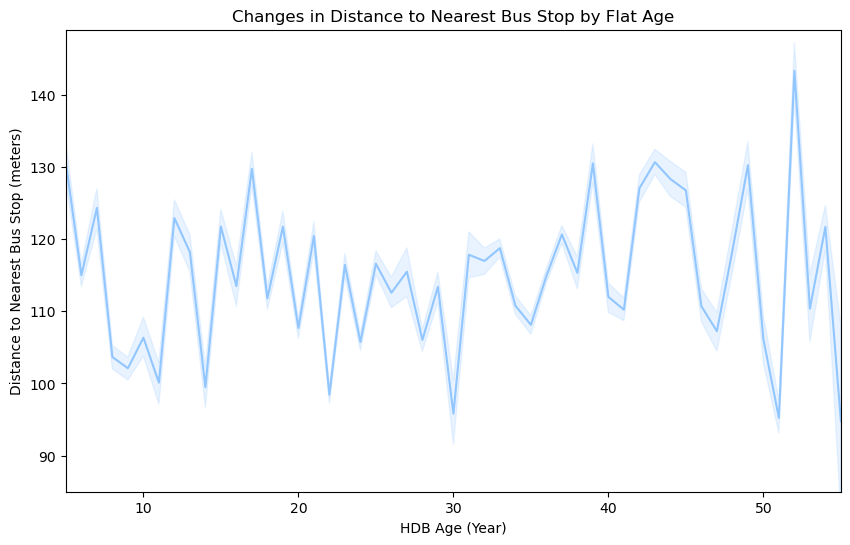

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='hdb_age', y='bus_stop_nearest_distance')

plt.xlabel('HDB Age (Year)')
plt.ylabel('Distance to Nearest Bus Stop (meters)')
plt.title('Changes in Distance to Nearest Bus Stop by Flat Age')
plt.xlim(5,55)
plt.ylim(85,149)
plt.show()

In general, the majority of HDB flats are situated within a proximity of 100 to 140 meters from a nearby bus stop, with no discernible trend observed across the age of flat.

---
## Features Review and Selection
---

In this section, we will do the following:
- For columns that have only 2 unique values, run t-tests to see if there is significant difference between the 2 unique values with respect to resale price
- Do ordinal encoding to group values together based on quantiles to reduce model complexity

In [50]:
#checking for number of unique values in each quantitative column
two_unique_values_col_num = []
for x in data.select_dtypes(include=('int64', 'float64')).columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 2:
        two_unique_values_col_num.append(x)

floor_area_sqm 169
resale_price 3295
tranc_year 10
tranc_month 12
lower 22
upper 23
mid 22
hdb_age 54
max_floor_lvl 41
total_dwelling_units 320
1room_sold 2
2room_sold 99
3room_sold 255
4room_sold 200
5room_sold 133
exec_sold 103
multigen_sold 7
studio_apartment_sold 61
1room_rental 11
2room_rental 48
3room_rental 15
other_room_rental 3
mall_nearest_distance 8983
mall_within_500m 7
mall_within_1km 16
mall_within_2km 42
hawker_nearest_distance 9126
hawker_within_500m 6
hawker_within_1km 10
hawker_within_2km 20
hawker_food_stalls 52
hawker_market_stalls 70
mrt_nearest_distance 9126
bus_interchange 2
mrt_interchange 2
bus_stop_nearest_distance 9126
pri_sch_nearest_distance 9126
vacancy 66
pri_sch_affiliation 2
sec_sch_nearest_dist 9126
cutoff_point 54
affiliation 2
decade 6


### 1room_sold, mrt_interchange, pri_sch_affiliation, affiliation, bus_interchange (Numerical)

In [51]:
two_unique_values_col_num

['1room_sold',
 'bus_interchange',
 'mrt_interchange',
 'pri_sch_affiliation',
 'affiliation']

In [52]:
#Dropping columns with only 2 unique values but no significant differences between the two groups
for col in two_unique_values_col_num:
    x,y = data[col].unique()
    t_statistic, p_value = stats.ttest_ind(data[data[col] == x]['resale_price'], data[data[col] == y]['resale_price'])
    if p_value > 0.05:
        data.drop(col, axis = 1, inplace = True)
        print()
        print('---------')
        print(f'{col}: t-statistic: {round(t_statistic, 3)}, p-value: {round(p_value,3)}')
        print(f'{col} dropped as p-value > 0.05')
        print('---------')
        print()
    else:
        print(f'{col}: t-statistic: {round(t_statistic, 3)}, p-value: {round(p_value,3)}')

1room_sold: t-statistic: 15.317, p-value: 0.0

---------
bus_interchange: t-statistic: -0.989, p-value: 0.323
bus_interchange dropped as p-value > 0.05
---------

mrt_interchange: t-statistic: -25.833, p-value: 0.0
pri_sch_affiliation: t-statistic: 12.01, p-value: 0.0

---------
affiliation: t-statistic: 0.181, p-value: 0.856
affiliation dropped as p-value > 0.05
---------



### Categorical variables 

In [53]:
two_unique_values_col_cat = []
for x in data.select_dtypes(include='object').columns:
    print(x, len(data[x].unique()))
    if len(data[x].unique()) == 2:
           two_unique_values_col_cat.append(x)

flat_type 7
storey_range 25
flat_model 20
commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
planning_area 32
mrt_name 94
pri_sch_name 177
sec_sch_name 134


### commercial, market_hawker, multistorey_carpark, precinct_pavilion (Categorical)

In [54]:
#Dropping columns with only 2 unique values but no significant differences between the two groups
for col in two_unique_values_col_cat:
    x,y = data[col].unique()
    t_statistic, p_value = stats.ttest_ind(data[data[col] == x]['resale_price'], data[data[col] == y]['resale_price'])
    print(f'{col}: t-statistic: {round(t_statistic, 3)}, p-value: {round(p_value,3)}')
    if p_value > 0.05:
        data.drop(col, axis = 1, inplace = True)
        print(f'{col} dropped as p-value > 0.05')
    print()

commercial: t-statistic: 54.95, p-value: 0.0

market_hawker: t-statistic: 2.305, p-value: 0.021

multistorey_carpark: t-statistic: 3.027, p-value: 0.002

precinct_pavilion: t-statistic: -0.277, p-value: 0.781
precinct_pavilion dropped as p-value > 0.05



### Quantiles Definition

In [55]:
def calculate_quantiles(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), np.std(x)], index=['Q1', 'Q2', 'Q3', 'Std Dev'])

In [56]:
def replaceterm(data_col, listofvalues, newterm):
    return data[data_col].replace(listofvalues, newterm, inplace = True)

### Storey Range

In [57]:
data['storey_range'].unique()

array(['10 TO 12', '07 TO 09', '13 TO 15', '01 TO 05', '01 TO 03',
       '06 TO 10', '28 TO 30', '19 TO 21', '04 TO 06', '16 TO 18',
       '22 TO 24', '16 TO 20', '34 TO 36', '25 TO 27', '11 TO 15',
       '37 TO 39', '31 TO 33', '43 TO 45', '40 TO 42', '21 TO 25',
       '49 TO 51', '46 TO 48', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [58]:
replaceterm('storey_range', ['01 TO 05', '01 TO 03', '04 TO 06'], 1)
replaceterm('storey_range', ['07 TO 09', '06 TO 10'], 2)
replaceterm('storey_range', ['10 TO 12', '13 TO 15', '11 TO 15'], 3)
replaceterm('storey_range', ['16 TO 18', '16 TO 20', '19 TO 21',], 4)
replaceterm('storey_range', ['21 TO 25', '22 TO 24'], 5)
replaceterm('storey_range', [ '25 TO 27', '26 TO 30', '28 TO 30'], 6)
replaceterm('storey_range', ['31 TO 33', '31 TO 35', '36 TO 40', '34 TO 36', '37 TO 39'], 7)
replaceterm('storey_range', ['43 TO 45', '40 TO 42', '49 TO 51', '46 TO 48'], 8)

### flat_type

In [59]:
data.groupby('flat_type')['resale_price'].apply(calculate_quantiles).unstack()

,Q1,Q2,Q3,Std Dev
flat_type,,,,
1 ROOM,185000.0,209000.0,230000.0,25157.510690
2 ROOM,222000.0,245000.0,265000.0,35645.399904
3 ROOM,284000.0,318000.0,355000.0,68183.242489
4 ROOM,373000.0,420000.0,480000.0,109952.991210
5 ROOM,445000.0,500000.0,590000.0,134931.827799
EXECUTIVE,560000.0,615000.0,690000.0,108538.078981
MULTI-GENERATION,719500.0,765500.0,815750.0,77169.603401


Text(0.5, 1.0, 'Resale Price vs Flat Type')

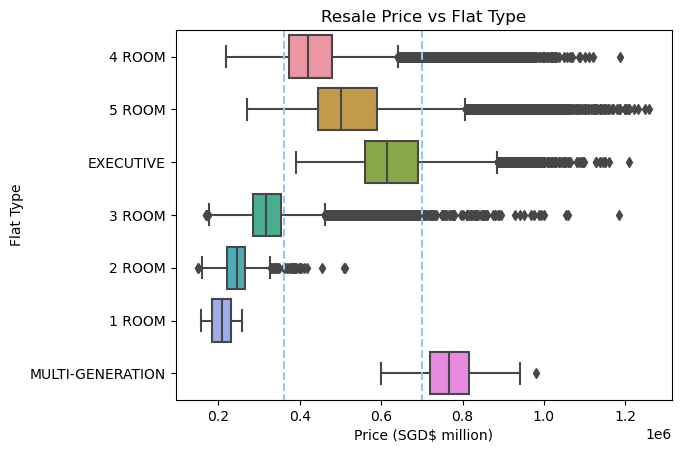

In [60]:
sns.boxplot(y = 'flat_type', x = 'resale_price', data=data)
locs, labels = plt.yticks()
plt.yticks(locs, data['flat_type'].unique())
plt.xlabel('Price (SGD$ million)')
plt.ylabel('Flat Type')
plt.vlines(360000, ymin = -0.5, ymax=6.5, linestyles='dashed')
plt.vlines(700000, ymin = -0.5, ymax=6.5, linestyles='dashed')
plt.title('Resale Price vs Flat Type')

In [61]:
low_flat_type = ['1 ROOM', '2 ROOM', '3 ROOM']
mid_flat_type = ['EXECUTIVE', '5 ROOM', '4 ROOM']
high_flat_type = ['MULTI-GENERATION']

In [62]:
replaceterm('flat_type', low_flat_type, 'low')
replaceterm('flat_type', mid_flat_type, 'mid')
replaceterm('flat_type', high_flat_type, 'high')

Text(0.5, 1.0, 'Resale Price vs Flat Type')

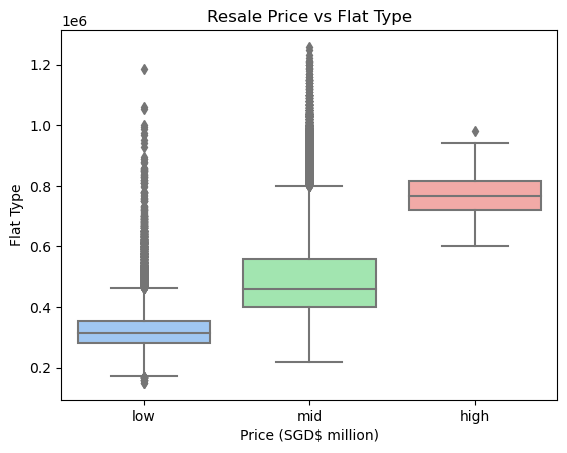

In [63]:
sns.boxplot(x = 'flat_type', y = 'resale_price', data=data, order = ['low', 'mid', 'high'])
plt.xlabel('Price (SGD$ million)')
plt.ylabel('Flat Type')
plt.title('Resale Price vs Flat Type')

### flat_model

Text(0.5, 1.0, 'Resale Price vs Flat Model')

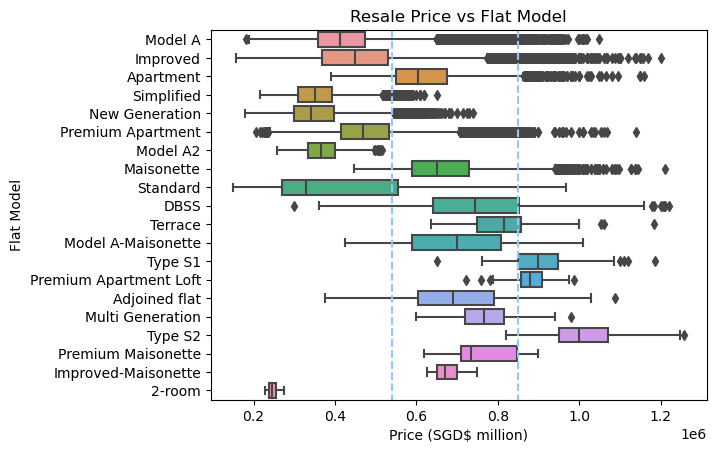

In [64]:
sns.boxplot(y = 'flat_model', x = 'resale_price', data=data)
plt.xlabel('Price (SGD$ million)')
plt.ylabel('Flat Model')
plt.vlines(540000, ymin = -0.5, ymax=19.5, linestyles='dashed')
plt.vlines(850000, ymin = -0.5, ymax=19.5, linestyles='dashed')
plt.title('Resale Price vs Flat Model')

In [65]:
#Doing ordinal encoding for flat_model
low_flat_model = ['2-room', 'Standard', 'Model A2', 'Premium Apartment', 'New Generation', 'Simplified', 'Improved', 'Model A']
high_flat_model = ['Type S2', 'Premium Apartment Loft', 'Type S1']
mid_flat_model = [x for x in data['flat_model'].unique().tolist() if x not in (low_flat_model + high_flat_model)]

In [66]:
replaceterm('flat_model', low_flat_model, 'low')
replaceterm('flat_model', mid_flat_model, 'mid')
replaceterm('flat_model', high_flat_model, 'high')

Text(0.5, 1.0, 'Resale Price vs Flat Model')

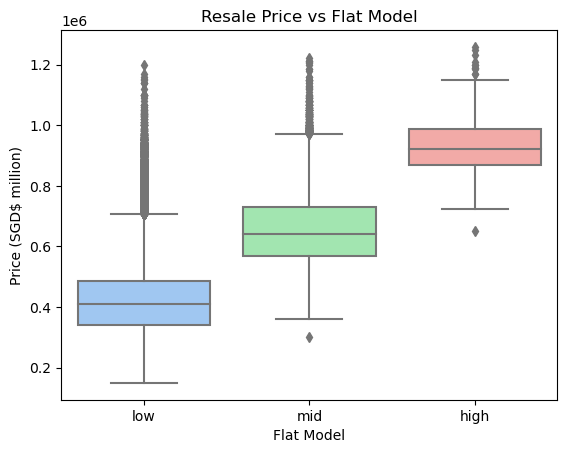

In [67]:
sns.boxplot(x = 'flat_model', y = 'resale_price', data=data)
plt.ylabel('Price (SGD$ million)')
plt.xlabel('Flat Model')
plt.title('Resale Price vs Flat Model')

### planning_area

In [68]:
data.groupby('planning_area')['resale_price'].apply(calculate_quantiles).unstack()

,Q1,Q2,Q3,Std Dev
planning_area,,,,
ang mo kio,308000.0,365000.0,473000.0,149769.234387
bedok,310000.0,380000.0,492000.0,138513.224231
bishan,498000.0,595000.0,738000.0,173598.909610
bukit batok,300000.0,368000.0,463000.0,124123.578664
bukit merah,370000.0,568000.0,725000.0,199466.016881
bukit panjang,354000.0,425000.0,498000.0,104823.940018
bukit timah,555350.0,705500.0,873750.0,194277.747497
changi,280000.0,295000.0,305375.0,22291.357654
choa chu kang,350000.0,401000.0,463000.0,84266.344422


Text(0.5, 1.0, 'Resale Price vs Planning Area')

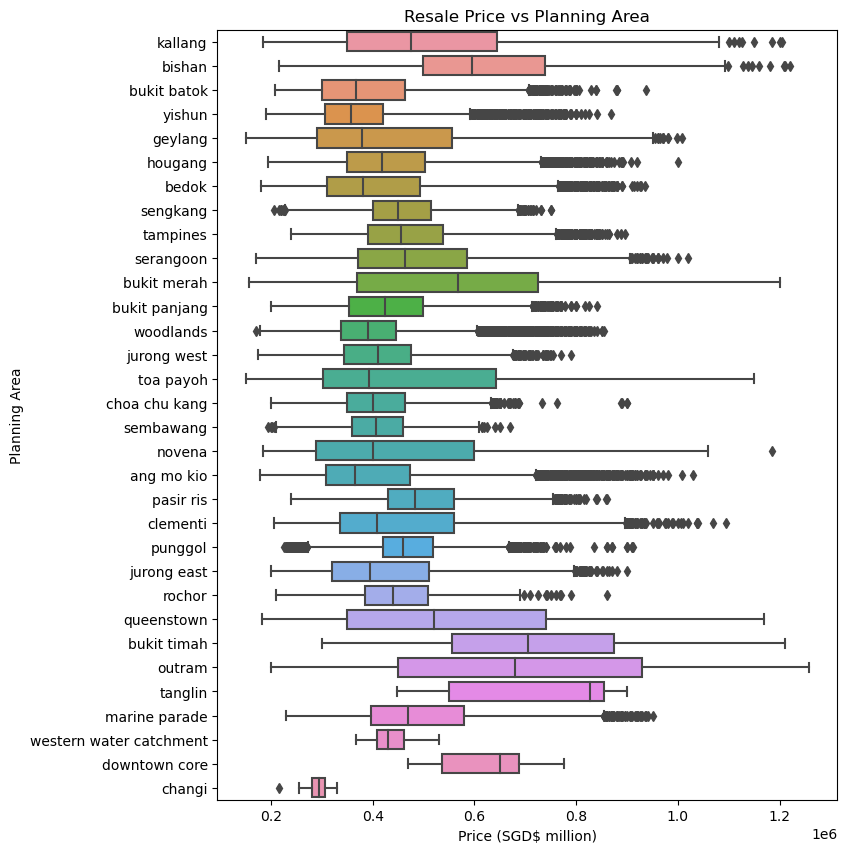

In [69]:
plt.figure(figsize=(8,10))
sns.boxplot(y = 'planning_area', x = 'resale_price', data=data)
plt.xlabel('Price (SGD$ million)')
plt.ylabel('Planning Area')
plt.title('Resale Price vs Planning Area')

In [70]:
data['planning_area'].unique()

array(['kallang', 'bishan', 'bukit batok', 'yishun', 'geylang', 'hougang',
       'bedok', 'sengkang', 'tampines', 'serangoon', 'bukit merah',
       'bukit panjang', 'woodlands', 'jurong west', 'toa payoh',
       'choa chu kang', 'sembawang', 'novena', 'ang mo kio', 'pasir ris',
       'clementi', 'punggol', 'jurong east', 'rochor', 'queenstown',
       'bukit timah', 'outram', 'tanglin', 'marine parade',
       'western water catchment', 'downtown core', 'changi'], dtype=object)

In [71]:
low_area = ['ang mo kio', 'bedok', 'bukit batok', 'bukit panjang', 'changi', 'choa chu kang', 'jurong west', 'sembawang', 'western water catchment', 'woodlands', 'yishun']
mid1_area = ['clementi', 'geylang', 'hougang', 'jurong east', 'marine parade', 'novena', 'pasir ris', 'punggol', 'rochor', 'sengkang', 'serangoon', 'tampines', 'toa payoh']
mid2_area = ['bukit merah', 'kallang', 'queenstown']
high_area = ['downtown core', 'tanglin', 'outram', 'bukit timah', 'bishan']

In [72]:
replaceterm('planning_area', low_area, 'low')
replaceterm('planning_area', mid1_area, 'mid1')
replaceterm('planning_area', mid2_area, 'mid2')
replaceterm('planning_area', high_area, 'high')

Text(0.5, 1.0, 'Resale Price vs Planning Area')

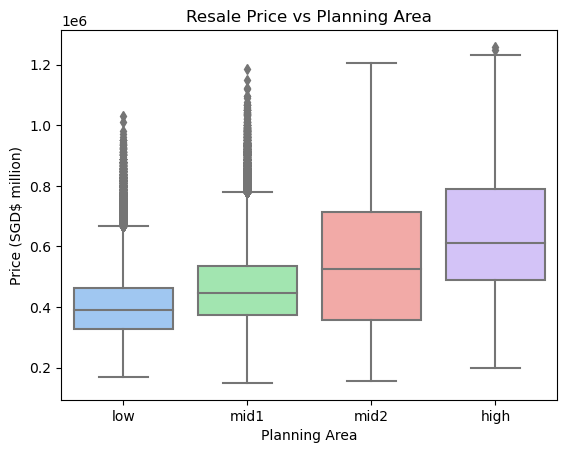

In [73]:
sns.boxplot(x = 'planning_area', y = 'resale_price', data=data, order = ['low', 'mid1', 'mid2', 'high'])
plt.ylabel('Price (SGD$ million)')
plt.xlabel('Planning Area')
plt.title('Resale Price vs Planning Area')

### mrt_name

In [74]:
data.groupby('mrt_name')['resale_price'].apply(calculate_quantiles).unstack()

,Q1,Q2,Q3,Std Dev
mrt_name,,,,
Admiralty,358000.0,400000.0,440000.0,70793.914395
Aljunied,320000.0,376000.0,523500.0,151976.186933
Ang Mo Kio,315000.0,378000.0,515000.0,158096.074579
Bartley,411750.0,485000.0,585750.0,111296.162942
Beauty World,675000.0,777500.0,915000.0,144623.957462
Bedok,315000.0,370500.0,488000.0,145580.097298
Bedok North,290000.0,330000.0,420200.0,119766.862486
Bedok Reservoir,300000.0,358000.0,505000.0,126420.703676
Bencoolen,440200.0,477500.0,538750.0,86566.514936


In [75]:
low_mrt = ['Admiralty', 'Bedok', 'Bedok North', 'Boon Lay', 'Braddell', 'Bukit Batok', 'Bukit Gombak','Bukit Panjang', 'Canberra', 'Cashew', 'Changi Airport', 'Chinatown', 'Chinese Garden', 'Choa Chu Kang', 'Clarke Quay', 'Hougang', 'Khatib', 'Lakeside', 'MacPherson', 'Marsiling', 'Mattar', 'Nicoll Highway', 'Pioneer', 'Rochor', 'Sembawang', 'Tai Seng', 'Tanah Merah', 'Ubi', 'Woodlands North', 'Woodlands South', 'Yew Tee', 'Yio Chu Kang', 'Yishun']
mid1_mrt = ['Aljunied', 'Ang Mo Kio', 'Bartley', 'Bedok Reservoir', 'Bencoolen', 'Botanic Gardens', 'Buangkok', 'Bugis', 'Clementi', 'Dakota', 'Geylang Bahru', 'HarbourFront', 'Jalan Besar', 'Jurong East', 'Kaki Bukit', 'Kovan', 'Little India', 'Pasir Ris', 'Paya Lebar', 'Potong Pasir', 'Punggol', 'Sengkang', 'Simei', 'Tampines', 'Tampines East', 'Tampines West', 'Woodlands', 'Woodleigh']
mid2_mrt = ['Boon Keng', 'Buona Vista', 'Commonwealth', 'Dover', 'Eunos', 'Farrer Park', 'Hillview', 'Holland Village', 'Kallang', 'Kembangan', 'Lavender', 'Lorong Chuan', 'Marymount', 'Mountbatten', 'Queenstown', 'Serangoon', 'Telok Blangah', 'Tiong Bahru', 'Toa Payoh', 'Upper Changi', 'one-north']
high_mrt = ['Beauty World', 'Bendemeer', 'Bishan', 'Bras Basah', 'Caldecott', 'Farrer Road', 'Labrador Park', 'Novena', 'Outram Park', 'Redhill', 'Tan Kah Kee', 'Tanjong Pagar']

In [76]:
replaceterm('mrt_name', low_mrt, 1)
replaceterm('mrt_name', mid1_mrt, 2)
replaceterm('mrt_name', mid2_mrt, 3)
replaceterm('mrt_name', high_mrt, 4)

Text(0.5, 1.0, 'Resale Price vs MRT')

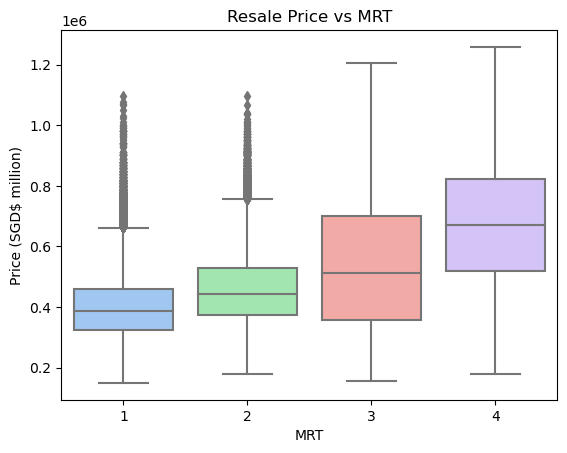

In [77]:
sns.boxplot(y = 'resale_price', x = 'mrt_name', data = data)
plt.ylabel('Price (SGD$ million)')
plt.xlabel('MRT')
plt.title('Resale Price vs MRT')

### pri_sch_name

In [78]:
data.groupby('pri_sch_name')['resale_price'].apply(calculate_quantiles).unstack()

,Q1,Q2,Q3,Std Dev
pri_sch_name,,,,
Admiralty Primary School,374000.00,418000.0,470000.0,76159.834784
Ahmad Ibrahim Primary School,280000.00,313500.0,360000.0,62692.207293
Ai Tong School,373500.00,531888.0,668444.0,175155.346419
Alexandra Primary School,389250.00,527500.0,737722.0,199265.523261
Anchor Green Primary School,400000.00,443500.0,520000.0,79456.011223
Anderson Primary School,305000.00,355000.0,467375.0,112441.544495
Ang Mo Kio Primary School,305000.00,355000.0,428000.0,119102.891660
Angsana Primary School,375000.00,438000.0,510000.0,92494.314361
Beacon Primary School,345000.00,396000.0,450000.0,71691.796823


In [79]:
low_pri = data.groupby('pri_sch_name')['resale_price'].apply(calculate_quantiles).unstack()[data.groupby('pri_sch_name')['resale_price'].apply(calculate_quantiles).unstack()['Q3']<550000].index.tolist()
mid1_pri = ['Anchor Green Primary School', 'Montfort Junior School', 'North Vista Primary School', 'Yuhua Primary School', 'Springdale Primary School', 'Pei Chun Public School', 'Casuarina Primary School', 'Pasir Ris Primary School', 'Palm View Primary School', 'Jing Shan Primary School', 'Cedar Primary School', 'Tao Nan School', 'CHIJ Our Lady of The Nativity', 'Bendemeer Primary School', 'Park View Primary School', 'Nanyang Primary School', 'Farrer Park Primary School', 'Poi Ching School', 'Radin Mas Primary School']
mid2_pri = ['New Town Primary School', 'Temasek Primary School', 'Eunos Primary School','Geylang Methodist School', 'Yangzheng Primary School', 'Guangyang Primary School', 'Pei Tong Primary School', 'Blangah Rise Primary School', 'Haig Girls\' School', 'Maris Stella High School', 'Ai Tong School', 'CHIJ Our Lady Queen of Peace', 'Hong Wen School', 'Qihua Primary School', 'Tampines Primary School', 'CHIJ Primary', 'River Valley Primary School', 'Fairfield Methodist School', 'Nan Hua Primary School', 'Alexandra Primary School', 'Ngee Ann Primary School', 'Kong Hwa School', 'Zhangde Primary School', 'Kheng Cheng School', 'Henry Park Primary School', 'Queenstown Primary School']
high_pri = data.groupby('pri_sch_name')['resale_price'].apply(calculate_quantiles).unstack()[data.groupby('pri_sch_name')['resale_price'].apply(calculate_quantiles).unstack()['Q1']>468000].index.tolist()

In [80]:
replaceterm('pri_sch_name', low_pri, 1)
replaceterm('pri_sch_name', mid1_pri, 2)
replaceterm('pri_sch_name', mid2_pri, 3)
replaceterm('pri_sch_name', high_pri, 4)

Text(0.5, 1.0, 'Resale Price vs Nearest Primary School')

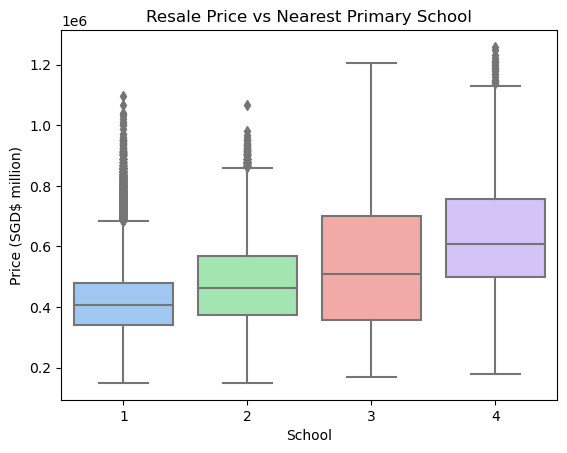

In [81]:
sns.boxplot(y = 'resale_price', x = 'pri_sch_name', data = data)
plt.ylabel('Price (SGD$ million)')
plt.xlabel('School')
plt.title('Resale Price vs Nearest Primary School')

### sec_sch_name

In [82]:
data.groupby('sec_sch_name')['resale_price'].apply(calculate_quantiles).unstack()

,Q1,Q2,Q3,Std Dev
sec_sch_name,,,,
Admiralty Secondary School,360000.0,400000.0,441888.0,69472.705518
Ahmad Ibrahim Secondary School,280000.0,315000.0,365000.0,66017.866440
Anderson Secondary School,311000.0,373000.0,629500.0,191267.230606
Ang Mo Kio Secondary School,335000.0,428400.0,578000.0,162905.574947
Anglican High School,300000.0,345000.0,414500.0,90427.267551
Anglo-Chinese School,590000.0,622500.0,644750.0,42973.567457
Assumption English School,328750.0,369750.0,608750.0,169413.746675
Bartley Secondary School,260000.0,320000.0,538750.0,170247.850513
Beatty Secondary School,280000.0,346000.0,578000.0,187913.145628


In [83]:
low_sec = ['Woodlands Secondary School','Ahmad Ibrahim Secondary School','Dunearn Secondary School','Yishun Secondary School','Tanglin Secondary School','Marsiling Secondary School','CHIJ Saint Nicholas Girls\' School','Hong Kah Secondary School','Juying Secondary School','Anglican High School','Northland Secondary School','Northbrooks Secondary School','Yio Chu Kang Secondary School','Damai Secondary School','Fuhua Secondary School','Kent Ridge Secondary School','Greenridge Secondary School','Evergreen Secondary School','Mayflower Secondary School','River Valley High School','Hua Yi Secondary School','Teck Whye Secondary School','Xinmin Secondary School','Yishun Town Secondary School','Admiralty Secondary School','Hillgrove Secondary School','Canberra Secondary School','Commonwealth Secondary School','Ping Yi Secondary School','Deyi Secondary School','Woodlands Ring Secondary School','Bukit Panjang Government High School','Chua Chu Kang Secondary School','Yuhua Secondary School','Woodgrove Secondary School','Westwood Secondary School','Kranji Secondary School','Orchid Park Secondary School','Christ Church Secondary School','Pei Hwa Secondary School','Naval Base Secondary School','CHIJ Saint Joseph\'s Convent','Yuying Secondary School','Unity Secondary School','Fuchun Secondary School','Sembawang Secondary School','Bukit Batok Secondary School','Yuan Ching Secondary School','Pasir Ris Secondary School','Punggol Secondary School','Hougang Secondary School','Jurong Secondary School','Swiss Cottage Secondary School','West Spring Secondary School','Zhenghua Secondary School','Holy Innocents\' High School','Boon Lay Secondary School','Greendale Secondary School','Presbyterian High School','Dunman Secondary School','Jurong West Secondary School','East Spring Secondary School','Montfort Secondary School','Saint Andrew\'s Secondary School','Saint Hilda\'s Secondary School','Peicai Secondary School','Bedok Green Secondary School','Serangoon Garden Secondary School','Loyang Secondary School','Raffles Institution','Ngee Ann Secondary School','Paya Lebar Methodist Girls\' School','Regent Secondary School','Compassvale Secondary School','Seng Kang Secondary School','Raffles Girls\' School','Bartley Secondary School','Jurongville Secondary School','Edgefield Secondary School','Cedar Girls\' Secondary School','Nan Chiau High School','Geylang Methodist School','Bukit View Secondary School']
mid1_sec = ['Saint Patrick\'s School','Tampines Secondary School','North Vista Secondary School','Bedok View Secondary School','Meridian Secondary School','Riverside Secondary School','Dunman High School','Pasir Ris Crest Secondary School','Manjusri Secondary School','Junyuan Secondary School','Changkat Changi Secondary School','Zhonghua Secondary School','Clementi Town Secondary School','Ang Mo Kio Secondary School','Beatty Secondary School','Saint Anthony\'s Canossian Secondary School','Yusof Ishak Secondary School','Saint Margaret\'s Secondary School','Fajar Secondary School']
mid2_sec = ['CHIJ Saint Theresa\'s Convent','Bowen Secondary School','Assumption English School','Queensway Secondary School','Bendemeer Secondary School','Anderson Secondary School','Temasek Junior College','Tanjong Katong Secondary School','Serangoon Secondary School','Guangyang Secondary School','Saint Gabriel\'s Secondary School','New Town Secondary School','Hai Sing Catholic School','Chung Cheng High School','Springfield Secondary School','Temasek Secondary School','Peirce Secondary School','Nan Hua High School','Bukit Merah Secondary School','Fairfield Methodist School','Gan Eng Seng School','CHIJ Secondary','CHIJ Katong Convent','Broadrick Secondary School','Outram Secondary School']
high_sec = ['Crescent Girls\' School','Queenstown Secondary School','Methodist Girls\' School','Anglo-Chinese School','Catholic High School','Whitley Secondary School','Kuo Chuan Presbyterian Secondary School']

In [84]:
replaceterm('sec_sch_name', low_sec, 'low')
replaceterm('sec_sch_name', mid1_sec, 'mid1')
replaceterm('sec_sch_name', mid2_sec, 'mid2')
replaceterm('sec_sch_name', high_sec, 'high')

Text(0.5, 1.0, 'Resale Price vs Nearest Secondary School')

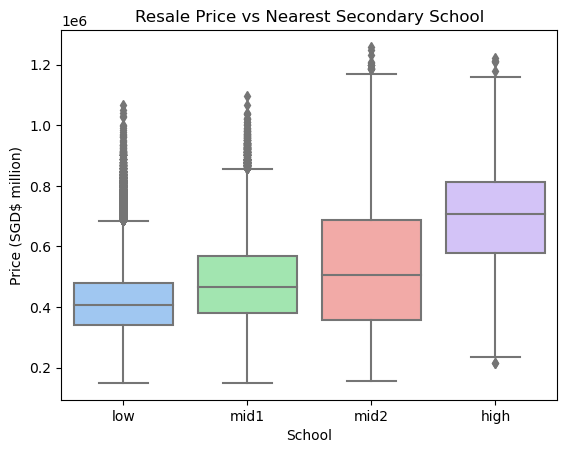

In [85]:
sns.boxplot(y = 'resale_price', x = 'sec_sch_name', data = data, order = ['low', 'mid1', 'mid2', 'high'])
plt.ylabel('Price (SGD$ million)')
plt.xlabel('School')
plt.title('Resale Price vs Nearest Secondary School')

## Dummification of Non-numerical Columns 

We will proceed to dummify non-numerical columns so that they can be used for modeling.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   flat_type                  150634 non-null  object 
 1   storey_range               150634 non-null  int64  
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   resale_price               150634 non-null  float64
 5   tranc_year                 150634 non-null  int64  
 6   tranc_month                150634 non-null  int64  
 7   lower                      150634 non-null  int64  
 8   upper                      150634 non-null  int64  
 9   mid                        150634 non-null  int64  
 10  hdb_age                    150634 non-null  int64  
 11  max_floor_lvl              150634 non-null  int64  
 12  commercial                 150634 non-null  object 
 13  market_hawker              15

In [87]:
encoded_data = pd.get_dummies(data, columns=['1room_sold', 'mrt_interchange', 'pri_sch_affiliation', 'planning_area', 'flat_model', 'flat_type', 'multistorey_carpark', 'commercial', 'market_hawker', 'sec_sch_name'], drop_first=True)

In [88]:
encoded_data.shape

(150634, 57)

### Creating interactions terms

In [89]:
encoded_data['sqm_year_max_floor'] = encoded_data['floor_area_sqm'] * encoded_data['tranc_year'] * encoded_data['max_floor_lvl']
encoded_data['max_floor_5room'] = encoded_data['max_floor_lvl'] * encoded_data['5room_sold']
encoded_data['age_3room'] = encoded_data['hdb_age'] * encoded_data['3room_sold']
encoded_data['floor_hawker2km'] = encoded_data['mid'] * encoded_data['hawker_within_2km']
encoded_data['age_totalunit'] = encoded_data['hdb_age'] * encoded_data['total_dwelling_units']
encoded_data['year_floor'] = encoded_data['tranc_year'] * encoded_data['mid']
encoded_data['maxfloor_secsch'] = encoded_data['max_floor_lvl'] * encoded_data['sec_sch_nearest_dist']
encoded_data['year_age'] = encoded_data['tranc_year'] * encoded_data['hdb_age']
encoded_data['age_execsold'] = encoded_data['hdb_age'] * encoded_data['exec_sold']
encoded_data['age_pri_sch'] = encoded_data['hdb_age'] * encoded_data['pri_sch_nearest_distance']
encoded_data['floor_hawker'] = encoded_data['mid'] * encoded_data['hawker_market_stalls']
encoded_data['floor_mall1km'] = encoded_data['mid'] * encoded_data['mall_within_1km']
encoded_data['which_floor'] = encoded_data['mid'] * encoded_data['storey_range']
encoded_data['floor_maxfloor'] = encoded_data['max_floor_lvl'] * encoded_data['which_floor']

In [90]:
selected_col = ['floor_area_sqm', 'pri_sch_name','max_floor_lvl', 'flat_model_low', 'sec_sch_name_low', 'hdb_age', 'hawker_within_2km',
'mrt_nearest_distance', 'flat_model_mid', 'mrt_name', 'mid', 'planning_area_low', 'sec_sch_nearest_dist',
'mall_within_2km', 'sqm_year_max_floor', 'max_floor_5room', 'age_3room', 'floor_hawker2km', 'age_totalunit', 'year_floor', 'maxfloor_secsch', 
'year_age', 'age_execsold', 'age_pri_sch', 'floor_hawker', 'floor_mall1km', 'storey_range', 'which_floor', 'floor_maxfloor']

In [91]:
X = encoded_data[selected_col]
y = data['resale_price']

In [92]:
X.skew().sort_values()

flat_model_low         -2.912722
sec_sch_name_low       -0.850126
hdb_age                -0.196927
year_age               -0.196583
planning_area_low       0.133869
floor_area_sqm          0.271862
mrt_name                0.879497
hawker_within_2km       1.145569
mrt_nearest_distance    1.146725
storey_range            1.191352
sqm_year_max_floor      1.357442
pri_sch_name            1.534089
mid                     1.557997
year_floor              1.559332
sec_sch_nearest_dist    1.812095
max_floor_lvl           2.029228
age_pri_sch             2.254331
age_totalunit           2.421883
age_3room               2.704827
flat_model_mid          2.975420
max_floor_5room         3.026984
maxfloor_secsch         3.088535
floor_hawker            3.159103
floor_mall1km           3.493342
floor_hawker2km         3.732120
age_execsold            3.914698
which_floor             4.115707
mall_within_2km         4.634232
floor_maxfloor          7.407588
dtype: float64

In [93]:
skew_list_log = ['floor_maxfloor', 'which_floor', 'maxfloor_secsch']

for x in skew_list_log:
    X[x] = np.log(X[x])

In [94]:
skew_list = ['mall_within_2km', 'age_execsold', 'floor_hawker2km', 'floor_mall1km', 'floor_hawker', 'max_floor_5room']

for x in skew_list:
    X[x] = np.sqrt(X[x])

In [95]:
X.skew()

floor_area_sqm          0.271862
pri_sch_name            1.534089
max_floor_lvl           2.029228
flat_model_low         -2.912722
sec_sch_name_low       -0.850126
hdb_age                -0.196927
hawker_within_2km       1.145569
mrt_nearest_distance    1.146725
flat_model_mid          2.975420
mrt_name                0.879497
mid                     1.557997
planning_area_low       0.133869
sec_sch_nearest_dist    1.812095
mall_within_2km         1.281302
sqm_year_max_floor      1.357442
max_floor_5room         0.880558
age_3room               2.704827
floor_hawker2km         1.275237
age_totalunit           2.421883
year_floor              1.559332
maxfloor_secsch        -0.014426
year_age               -0.196583
age_execsold            2.902259
age_pri_sch             2.254331
floor_hawker            0.554548
floor_mall1km           0.553888
storey_range            1.191352
which_floor             0.013269
floor_maxfloor          0.140323
dtype: float64

In [96]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

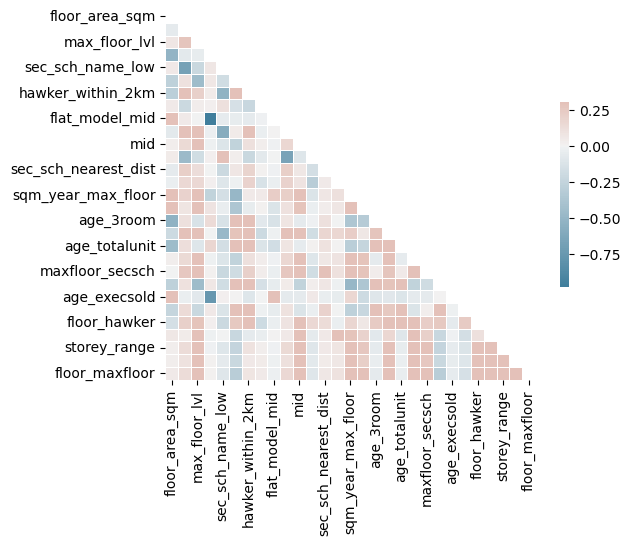

In [97]:
corr = X_scaled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

---
## Train-Test Split and checking Model Score
---

In this next section, we will begin building our models with using linear regression, RidgeCV and LassoCV

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5)

### Linear Regression

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept: ', lr.intercept_)
lrpred=lr.predict(X_test)

print('Test R-squared score :', r2_score(y_test, lrpred))
print('Mean Squared Error: ',mean_squared_error(y_test,lrpred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lrpred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,lrpred)))
print('Linear Regression score:',lr.score(X_train,y_train))
print('Test Score: ',lr.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(lr, X_train, y_train, cv=5).mean())

Intercept:  421972.22590332315
Test R-squared score : 0.8652636207083418
Mean Squared Error:  2766922498.401415
Mean Absolute Error:  39741.06892763466
Root Mean Squared Error:  52601.54463893066
Linear Regression score: 0.8633342872700185
Test Score:  0.8652636207083418
Cross Validation Score: 0.8632464288666432


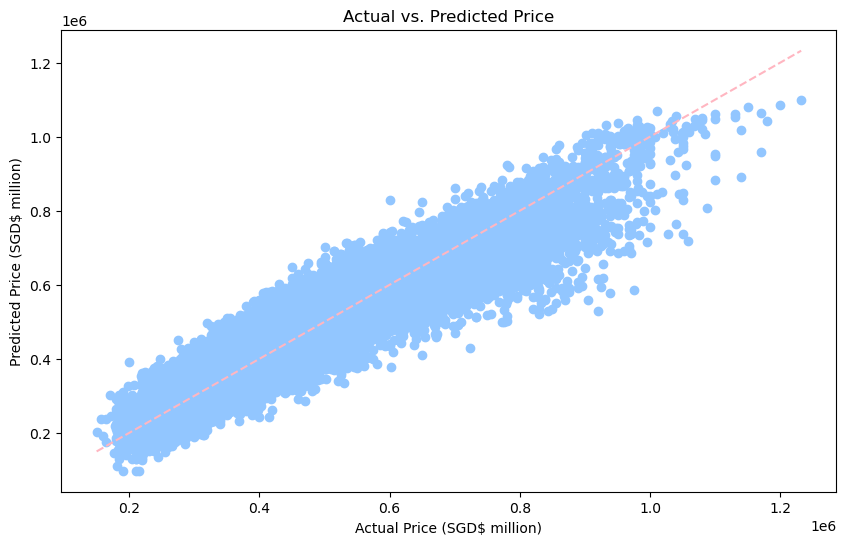

In [100]:
# Plot the results
plt.figure(figsize=(10,6))

# Scatter plot of actual test values versus predicted values
plt.scatter(y_test, lrpred)

# Line plot for perfect fit (actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'lightpink', linestyle = 'dashed')

plt.xlabel('Actual Price (SGD$ million)')
plt.ylabel('Predicted Price (SGD$ million)')
plt.title('Actual vs. Predicted Price')
plt.show()

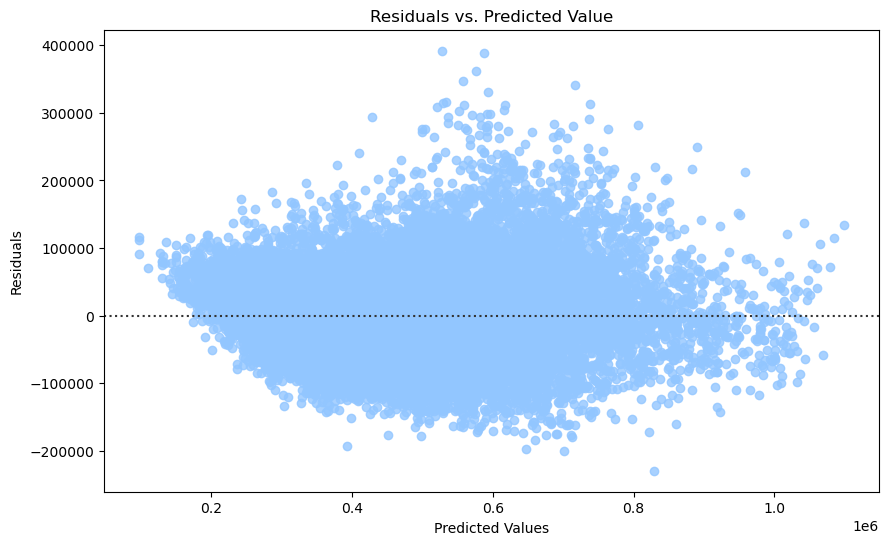

In [101]:
residuals = y_test - lrpred

# Create a seaborn residual plot
plt.figure(figsize=(10,6))
sns.residplot(x=lrpred, y=residuals)
plt.title('Residuals vs. Predicted Value')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Text(0.5, 1.0, 'Features Sorted by Importance in Predictions')

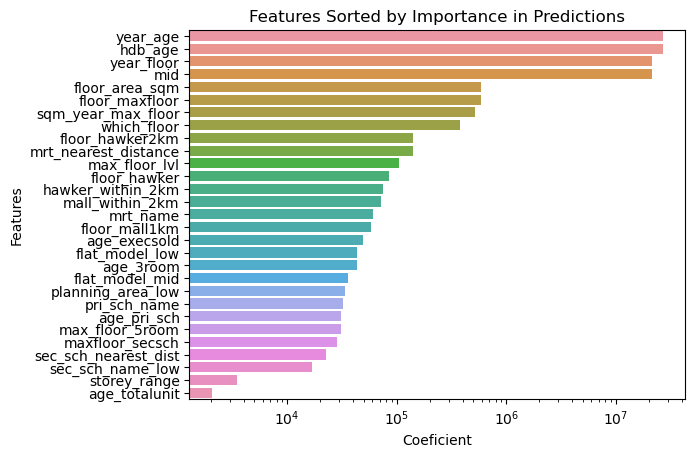

In [102]:
positive_coefs = np.abs(lr.coef_)
sorted_indices = np.argsort(positive_coefs)[::-1]
sorted_coefs = positive_coefs[sorted_indices]
sorted_columns = X.columns[sorted_indices]
sns.barplot(y = sorted_columns, x = sorted_coefs)
plt.xscale('log')
plt.xlabel('Coeficient')
plt.ylabel('Features')
plt.title('Features Sorted by Importance in Predictions')

### Ridge Model

In [103]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)

Best alpha: 0.01


In [104]:
ridge_pred = ridge_cv.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print('Test R-squared score :', r2_score(y_test, ridge_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,ridge_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,ridge_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,ridge_pred)))
print('Linear Regression score:',ridge_cv.score(X_train,y_train))
print('Test Score: ',ridge_cv.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(ridge_cv, X_train, y_train, cv=5).mean())

Test R-squared score : 0.8637451408962807
Mean Squared Error:  2798105731.7452865
Mean Absolute Error:  40098.48008992805
Root Mean Squared Error:  52897.124040398325
Linear Regression score: 0.8618784423058505
Test Score:  0.8637451408962807
Cross Validation Score: 0.8614862113612952


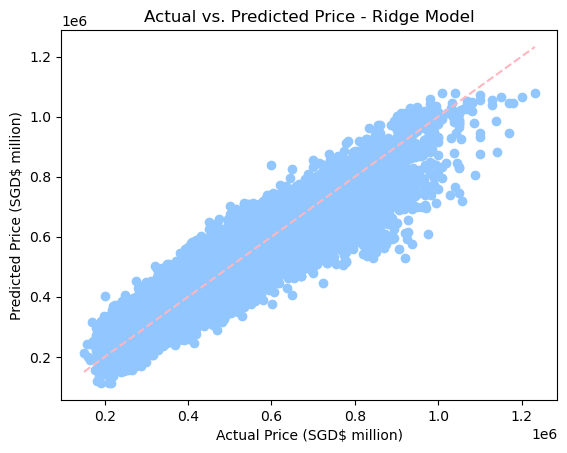

In [105]:
# Make predictions using the testing set
yridge_pred = ridge_cv.predict(X_test)

# Scatter plot of actual test values versus predicted values
plt.scatter(y_test, yridge_pred)

# Line plot for best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'lightpink', linestyle = 'dashed')

plt.xlabel('Actual Price (SGD$ million)')
plt.ylabel('Predicted Price (SGD$ million)')
plt.title('Actual vs. Predicted Price - Ridge Model')
plt.show()

### Lasso Model

In [106]:
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0])
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.01


In [107]:
lasso_pred = lasso_cv.predict(X_test)

# Calculate model performance

lasso_scores = cross_val_score(lasso_cv, X_train, y_train, cv=3)
print(lasso_scores)
print('Test R-squared score :', r2_score(y_test, lasso_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,lasso_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lasso_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('Linear Regression score:',lasso_cv.score(X_train,y_train))
print('Test Score: ',lasso_cv.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(lasso_cv, X_train, y_train, cv=5).mean())

[0.84614445 0.848745   0.85061594]
Test R-squared score : 0.8500389425582073
Mean Squared Error:  3079573801.0858994
Mean Absolute Error:  42734.72340234797
Root Mean Squared Error:  55493.9077835207
Linear Regression score: 0.8486220721256439
Test Score:  0.8500389425582073
Cross Validation Score: 0.8485245584218486


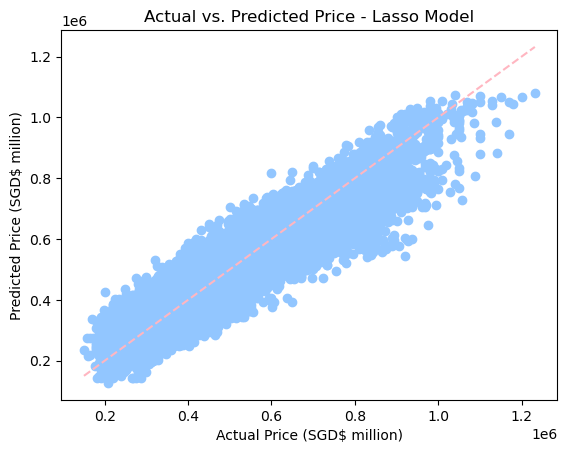

In [108]:
# Make predictions using the testing set
ylasso_pred = lasso_cv.predict(X_test)

# Scatter plot of actual test values versus predicted values
plt.scatter(y_test, ylasso_pred)

# Line plot for best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'lightpink', linestyle = 'dashed')

plt.xlabel('Actual Price (SGD$ million)')
plt.ylabel('Predicted Price (SGD$ million)')
plt.title('Actual vs. Predicted Price - Lasso Model')
plt.show()

### ElasticNet Model

In [109]:
# Instantiate ElasticNetCV
elastic_cv = ElasticNetCV(cv=10, random_state=5)

# Fit ElasticNetCV to the training data
elastic_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, random_state=5)

In [110]:
# Get the best alpha (regularization parameter)
alpha = elastic_cv.alpha_
# Get the best l1_ratio
l1_ratio = elastic_cv.l1_ratio_
print(f'Best alpha: {alpha}')
print(f'best l1_ratio: {l1_ratio}')

Best alpha: 43.54378064208389
best l1_ratio: 0.5


In [111]:
# Instantiate ElasticNet with best hyperparameters
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=5)

# Fit ElasticNet to the training data
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=43.54378064208389, random_state=5)

In [112]:
# Make predictions
y_pred = elastic_net.predict(X_test)

In [113]:
# Compute R-squared score
r2 = r2_score(y_test, y_pred)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Compute Root Mean Squared Error
rmse = np.sqrt(mse)

# Compute score
score = elastic_net.score(X_test, y_test)

# Compute Cross Validation Score
cv_score = cross_val_score(elastic_net, X_test, y_test, cv=10).mean()

In [114]:
print(cv_score)
print('Test R-squared score :', r2)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)
print('Linear Regression score:', elastic_net.score(X_train, y_train))
print('Test Score: ',lasso_cv.score(X_test, y_test))

0.014362811863503933
Test R-squared score : 0.01467748645264455
Mean Squared Error:  20234409186.65389
Mean Absolute Error:  109262.06749356813
Root Mean Squared Error:  142247.7036252392
Linear Regression score: 0.014657507609989406
Test Score:  0.8500389425582073


---
## Supplementary Code with PyCaret
---

This project's focus is on linear regression, ridge and lasso. As a revisit to this project after the General Assembly Data Science Immersive course has ended, I tried out PyCaret to build another regression model. PyCaret is a low-code library that simplifies model building which essentially does much more with less code.

In [115]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'resale_price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(150634, 51)"
4,Transformed data shape,"(150634, 61)"
5,Transformed train set shape,"(105443, 61)"
6,Transformed test set shape,"(45191, 61)"
7,Ordinal features,3
8,Numeric features,43
9,Categorical features,7


In [116]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:51:54
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,18144.0067,641603804.5760,25327.7575,0.9687,0.0546,0.0410,16.1010
et,Extra Trees Regressor,18271.8788,655374208.9045,25598.6567,0.9680,0.0548,0.0411,33.6340
xgboost,Extreme Gradient Boosting,19001.3562,667840236.8000,25841.2736,0.9674,0.0562,0.0431,7.4260
lightgbm,Light Gradient Boosting Machine,21410.0555,846676895.2407,29096.1928,0.9586,0.0625,0.0482,4.7890
dt,Decision Tree Regressor,25010.0352,1246527828.5800,35304.5488,0.9391,0.0762,0.0564,4.0120
gbr,Gradient Boosting Regressor,29731.2451,1653355065.4361,40660.7463,0.9192,0.0854,0.0665,11.7720
knn,K Neighbors Regressor,35005.0480,2392796467.2000,48912.0789,0.8831,0.1088,0.0810,4.3720
br,Bayesian Ridge,41165.5256,2953124982.3772,54340.7885,0.8557,0.1208,0.0947,3.5230
llar,Lasso Least Angle Regression,41164.8564,2953091507.3902,54340.4907,0.8557,0.1208,0.0947,3.1260
ridge,Ridge Regression,41165.1354,2953099298.3712,54340.5687,0.8557,0.1208,0.0947,3.1180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Random Forest Regressor through PyCaret has a much lower RMSE and higher R2, and are better than the previous linear/ridge/lasso regression models.

In [117]:
rf = create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

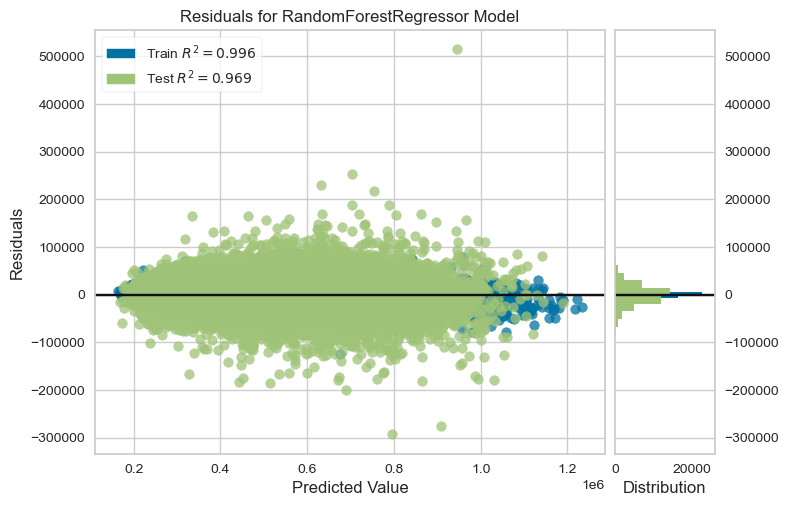

In [118]:
# plot residuals
plot_model(rf, plot = 'residuals')

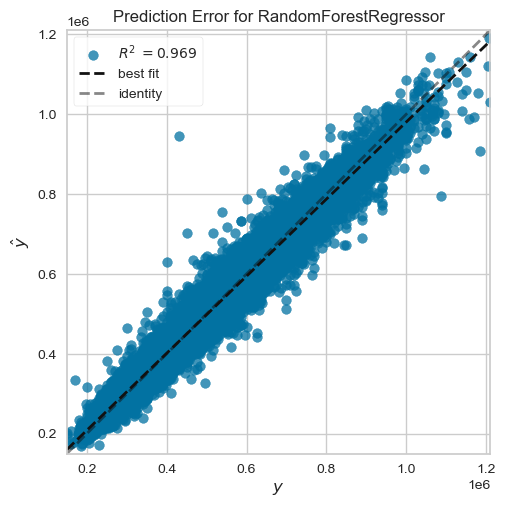

In [119]:
# plot error
plot_model(rf, plot = 'error')

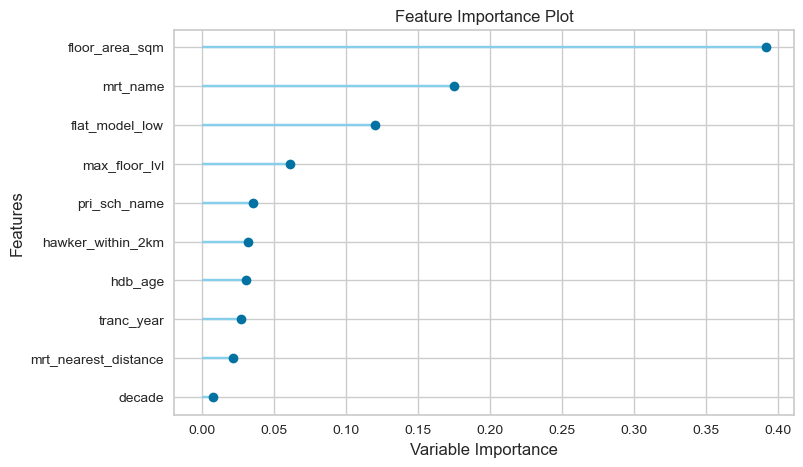

In [120]:
# plot feature importance
plot_model(rf, plot = 'feature')

### PyCaret compare_models with MinMax normalization

In [121]:
s_minmax = setup(data, target = 'resale_price', 
                 session_id = 123, 
                 normalize = True, 
                 normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(150634, 51)"
4,Transformed data shape,"(150634, 61)"
5,Transformed train set shape,"(105443, 61)"
6,Transformed test set shape,"(45191, 61)"
7,Ordinal features,3
8,Numeric features,43
9,Categorical features,7


In [122]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,18144.3217,641575744.4409,25327.3034,0.9687,0.0546,0.0410,27.2440
et,Extra Trees Regressor,18267.9763,655185718.8401,25594.9436,0.9680,0.0547,0.0411,32.0980
xgboost,Extreme Gradient Boosting,19001.5264,667871980.8000,25841.8930,0.9674,0.0562,0.0431,6.6990
lightgbm,Light Gradient Boosting Machine,21442.9157,849135435.6084,29138.5460,0.9585,0.0626,0.0483,4.9190
dt,Decision Tree Regressor,25019.0823,1245475956.1850,35289.5433,0.9391,0.0762,0.0564,3.8520
gbr,Gradient Boosting Regressor,29731.6925,1653381097.5699,40661.0674,0.9192,0.0854,0.0665,11.2010
knn,K Neighbors Regressor,32398.6174,2003009625.6000,44751.8730,0.9021,0.0950,0.0725,4.4580
br,Bayesian Ridge,41164.1683,2953112494.3326,54340.6923,0.8557,0.1208,0.0947,3.4350
llar,Lasso Least Angle Regression,41163.9193,2953176241.6328,54341.2775,0.8557,0.1208,0.0947,3.0330
ridge,Ridge Regression,41160.6902,2953238657.1360,54341.8513,0.8557,0.1208,0.0947,3.1210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Minmax normalization only gives a very minute improvement in RMSE, while having slightly worse MAE and higher TT. We will just take the non-minmax rf model and save it.

In [123]:
save_model(rf, 'best_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Jackson\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['storey_range', 'floor_area_sqm',
                                              'tranc_year', 'tranc_month',
                                              'lower', 'upper', 'mid', 'hdb_age',
                                              'max_floor_lvl',
                                              'total_dwelling_units',
                                              '1room_sold', '2room_sold',
                                              '3room_sold', '4room_sold',
                                              '5room_sold', 'exec_sold',
                                              'multig...
                  TransformerWrapper(include=['flat_type', 'flat_model',
                                              'planning_area', 'sec_sch_name'],
                                     transformer=OneHotEncoder(cols=['flat_typ

---
## Conclusion
---

Key takeaways:

1) The Random Forest Regressor model using PyCaret is the best at predicting resale price with the highest R^2 score of 0.9687 and lowest RMSE at 25327.7575

2) Top important features are: floor area, mrt, flat model, max floor level and primary school



The value in being able to predict HDB resale prices with machine learning models comes in the following:

1) Plan budget and expectations better.
2) The more information you have, the more you can make an informed choice. 
3) Minimise time and money wastage.
4) Get a better deal in the perspective of either the buyer or seller

---
## Prepare test dataset for Kaggle
---

In [124]:
data = pd.read_csv('datasets/test.csv')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [126]:
#standardizing all column names to be in snake case
data.columns = data.columns.str.lower().str.replace(' ','_')

In [127]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=2001)
data['mall_nearest_distance'] = imputer.fit_transform(data['mall_nearest_distance'].values.reshape(-1,1))

In [128]:
#filling null values with 0
col_with_null = data.columns[data.isnull().sum() != 0].to_list()
imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0)
for x in col_with_null:
    data[x]=imputer.fit_transform(data[x].values.reshape(-1,1))

In [143]:
data.drop('id', axis = 1, inplace=True)
data.drop(['block', 'street_name', 'address', 'postal', 'bus_stop_name'], axis = 1, inplace = True)
data.drop(['latitude', 'longitude', 'mrt_latitude', 'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude'], axis = 1, inplace = True)
data.drop('floor_area_sqft', axis = 1, inplace = True)
data.drop(['lease_commence_date','year_completed'], axis = 1, inplace = True)
data.drop('tranc_yearmonth', axis = 1, inplace=True)
data.drop('mid_storey', axis = 1, inplace=True)
data.drop('town', axis = 1, inplace=True)
data.drop('full_flat_type', axis = 1, inplace = True)
data['planning_area'] = data['planning_area'].str.lower()
data.drop('bus_interchange', axis = 1, inplace=True)
data.drop('affiliation', axis = 1, inplace=True)
data.drop('precinct_pavilion', axis = 1, inplace=True)


In [146]:
data['decade'] = (data['hdb_age'] // 10) * 10

In [148]:
data.drop('price_per_sqft', axis = 1, inplace = True)

In [150]:
data.drop('residential', axis = 1, inplace = True)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flat_type                  16737 non-null  object 
 1   storey_range               16737 non-null  int64  
 2   floor_area_sqm             16737 non-null  float64
 3   flat_model                 16737 non-null  object 
 4   tranc_year                 16737 non-null  int64  
 5   tranc_month                16737 non-null  int64  
 6   lower                      16737 non-null  int64  
 7   upper                      16737 non-null  int64  
 8   mid                        16737 non-null  int64  
 9   hdb_age                    16737 non-null  int64  
 10  max_floor_lvl              16737 non-null  int64  
 11  commercial                 16737 non-null  object 
 12  market_hawker              16737 non-null  object 
 13  multistorey_carpark        16737 non-null  obj

In [129]:
replaceterm('storey_range', ['01 TO 05', '01 TO 03', '04 TO 06'], 1)
replaceterm('storey_range', ['07 TO 09', '06 TO 10'], 2)
replaceterm('storey_range', ['10 TO 12', '13 TO 15', '11 TO 15'], 3)
replaceterm('storey_range', ['16 TO 18', '16 TO 20', '19 TO 21',], 4)
replaceterm('storey_range', ['21 TO 25', '22 TO 24'], 5)
replaceterm('storey_range', [ '25 TO 27', '26 TO 30', '28 TO 30'], 6)
replaceterm('storey_range', ['31 TO 33', '31 TO 35', '36 TO 40', '34 TO 36', '37 TO 39'], 7)
replaceterm('storey_range', ['43 TO 45', '40 TO 42', '49 TO 51', '46 TO 48'], 8)

In [130]:
replaceterm('flat_type', low_flat_type, 'low')
replaceterm('flat_type', mid_flat_type, 'mid')
replaceterm('flat_type', high_flat_type, 'high')

In [131]:
replaceterm('flat_model', low_flat_model, 'low')
replaceterm('flat_model', mid_flat_model, 'mid')
replaceterm('flat_model', high_flat_model, 'high')

In [132]:
data['planning_area'] = data['planning_area'].str.lower()
replaceterm('planning_area', low_area, 'low')
replaceterm('planning_area', mid1_area, 'mid1')
replaceterm('planning_area', mid2_area, 'mid2')
replaceterm('planning_area', high_area, 'high')

In [133]:
replaceterm('mrt_name', low_mrt, 1)
replaceterm('mrt_name', mid1_mrt, 2)
replaceterm('mrt_name', mid2_mrt, 3)
replaceterm('mrt_name', high_mrt, 4)

In [134]:
replaceterm('pri_sch_name', low_pri, 1)
replaceterm('pri_sch_name', mid1_pri, 2)
replaceterm('pri_sch_name', mid2_pri, 3)
replaceterm('pri_sch_name', high_pri, 4)

In [135]:
replaceterm('sec_sch_name', low_sec, 'low')
replaceterm('sec_sch_name', mid1_sec, 'mid1')
replaceterm('sec_sch_name', mid2_sec, 'mid2')
replaceterm('sec_sch_name', high_sec, 'high')

In [136]:
encoded_data = pd.get_dummies(data, columns=['1room_sold', 'mrt_interchange', 'pri_sch_affiliation', 'planning_area', 'flat_model', 'flat_type', 'multistorey_carpark', 'commercial', 'market_hawker', 'sec_sch_name'], drop_first=False)

In [137]:
encoded_data['sqm_year_max_floor'] = encoded_data['floor_area_sqm'] * encoded_data['tranc_year'] * encoded_data['max_floor_lvl']
encoded_data['max_floor_5room'] = encoded_data['max_floor_lvl'] * encoded_data['5room_sold']
encoded_data['age_3room'] = encoded_data['hdb_age'] * encoded_data['3room_sold']
encoded_data['floor_hawker2km'] = encoded_data['mid'] * encoded_data['hawker_within_2km']
encoded_data['age_totalunit'] = encoded_data['hdb_age'] * encoded_data['total_dwelling_units']
encoded_data['year_floor'] = encoded_data['tranc_year'] * encoded_data['mid']
encoded_data['maxfloor_secsch'] = encoded_data['max_floor_lvl'] * encoded_data['sec_sch_nearest_dist']
encoded_data['year_age'] = encoded_data['tranc_year'] * encoded_data['hdb_age']
encoded_data['age_execsold'] = encoded_data['hdb_age'] * encoded_data['exec_sold']
encoded_data['age_pri_sch'] = encoded_data['hdb_age'] * encoded_data['pri_sch_nearest_distance']
encoded_data['floor_hawker'] = encoded_data['mid'] * encoded_data['hawker_market_stalls']
encoded_data['floor_mall1km'] = encoded_data['mid'] * encoded_data['mall_within_1km']
encoded_data['which_floor'] = encoded_data['mid'] * encoded_data['storey_range']
encoded_data['floor_maxfloor'] = encoded_data['max_floor_lvl'] * encoded_data['which_floor']

In [138]:
encoded_data.columns

Index(['id', 'tranc_yearmonth', 'town', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'lease_commence_date', 'tranc_year', 'tranc_month',
       ...
       'age_totalunit', 'year_floor', 'maxfloor_secsch', 'year_age',
       'age_execsold', 'age_pri_sch', 'floor_hawker', 'floor_mall1km',
       'which_floor', 'floor_maxfloor'],
      dtype='object', length=106)

In [139]:
X = encoded_data[selected_col]

In [ ]:
for x in skew_list_log:
    X[x] = np.log(X[x])

for x in skew_list:
    X[x] = np.sqrt(X[x])

In [ ]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [ ]:
X_scaled

,floor_area_sqm,pri_sch_name,max_floor_lvl,flat_model_low,sec_sch_name_low,hdb_age,hawker_within_2km,mrt_nearest_distance,flat_model_mid,mrt_name,...,year_floor,maxfloor_secsch,year_age,age_execsold,age_pri_sch,floor_hawker,floor_mall1km,storey_range,which_floor,floor_maxfloor
0,0.212851,0.000000,0.208333,1.0,1.0,0.603774,0.052632,0.188696,0.0,0.000000,...,0.124420,0.344998,0.601233,0.000000,0.105513,0.281677,0.215353,0.142857,0.392472,0.454516
1,0.325301,0.000000,0.250000,1.0,1.0,0.207547,0.000000,0.041875,0.0,0.000000,...,0.062571,0.660953,0.207426,0.000000,0.040605,0.194672,0.120386,0.000000,0.172940,0.336050
2,0.148594,0.333333,0.208333,1.0,0.0,0.735849,0.578947,0.190843,0.0,0.333333,...,0.124503,0.468682,0.733168,0.094153,0.106187,0.253980,0.215353,0.142857,0.392472,0.454516
3,0.265060,0.000000,0.250000,1.0,1.0,0.754717,0.105263,0.310922,0.0,0.000000,...,0.000103,0.562170,0.753540,0.000000,0.286934,0.134393,0.000000,0.000000,0.000000,0.228468
4,0.289157,0.000000,0.479167,1.0,1.0,0.641509,0.105263,0.274236,0.0,0.000000,...,0.311751,0.541691,0.640164,0.000000,0.080811,0.345333,0.000000,0.428571,0.665562,0.710573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,0.204819,0.000000,0.187500,1.0,1.0,0.735849,0.421053,0.185130,0.0,0.000000,...,0.062416,0.461738,0.734317,0.000000,0.166933,0.258698,0.000000,0.000000,0.172940,0.307735
16733,0.244980,0.000000,0.291667,1.0,1.0,0.132075,0.000000,0.122214,0.0,0.333333,...,0.311927,0.582790,0.131823,0.000000,0.008293,0.000000,0.313928,0.428571,0.665562,0.658175
16734,0.317269,0.000000,0.291667,1.0,1.0,0.320755,0.000000,0.203700,0.0,0.000000,...,0.062519,0.634386,0.320400,0.000000,0.027681,0.134693,0.170251,0.000000,0.172940,0.351728
16735,0.212851,1.000000,0.145833,1.0,0.0,0.584906,0.368421,0.242928,0.0,1.000000,...,0.125080,0.426630,0.584906,0.000000,0.071523,0.222866,0.152277,0.142857,0.392472,0.420739


In [ ]:
#lrpred=lr.predict(X_scaled)

In [152]:
rfpred = predict_model(rf, data = data)

In [142]:
export_df = data['id'].to_frame()

In [ ]:
export_df['Predicted'] = rfpred['prediction_label']

In [156]:
export_df.columns = ['Id', 'Predicted']

In [157]:
export_df[['Id', 'Predicted']].to_csv('datasets/for_kaggle_rf.csv', index = False)

---
## Saving the Model to a Pickle File for Streamlit
---

In [ ]:
# Assuming 'data' is your DataFrame
feature_names = data.columns.tolist()

# Print the feature names
print(feature_names)


['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_lon

In [ ]:
# Save the model to a file
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_cv, f)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
# Assuming 'encoded_data' is your DataFrame
feature_names = encoded_data.columns.tolist()

# Print the feature names
print(feature_names)


['id', 'tranc_yearmonth', 'town', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'lease_commence_date', 'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'residential', 'precinct_pavilion', 'total_dwelling_units', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'postal', 'latitude', 'longitude', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name', 'bus_interchange', 'mrt_latitude', 'mrt_longitude', 'bus_stop_nearest_distance', 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_nearest_distance', 'pri_